## Projet 4 : Anticipez les besoins en consommation électrique de bâtiments  

### Prédiction de la consommation totale d'énergie

###  Import des librairies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

###  Lecture  du tableau de données pour l'année 2015

In [2]:
data_2015 = pd.read_csv('C:/Users/Brahim/Desktop/Mes projets/Projet P4/2015-building-energy-benchmarking.csv', sep=",")

### Lecture  du tableau de données pour l'année 2016

In [3]:
data_2016 = pd.read_csv('C:/Users/Brahim/Desktop/Mes projets/Projet P4/2016-building-energy-benchmarking.csv', sep=",")

In [4]:
# Liste des bâtiments du relevé de 2015 non relevé en 2016
ident_specifque_a_2015 = [elt for elt in data_2015["OSEBuildingID"].values if elt not in data_2016["OSEBuildingID"].values]

In [5]:
# Liste des bâtiments du relevé de 2016 non relevé en 2015
ident_specifque_a_2016 = [elt for elt in data_2016["OSEBuildingID"].values if elt not in data_2015["OSEBuildingID"].values]

In [6]:
# Les ordres de grandeur des 2 variables; GHGEmissions(MetricTonsCO2e) et TotalGHGEmissions sont similaires.
# On renomme la colonne de 2015 pour que le nom de la variable soit le même que pour 2016 pour les émissions de CO2
data_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)': 'TotalGHGEmissions'},
                 inplace=True)

In [7]:
# Les ordres de grandeur des 2 variables; GHGEmissionsIntensity(kgCO2e/ft2) et GHGEmissionsIntensity sont similaires.
# On renomme la colonne de 2015 pour que le nom de la variable soit le même que pour 2016 pour les émissions l'énergie
data_2015.rename(columns={'GHGEmissionsIntensity(kgCO2e/ft2)': 'GHGEmissionsIntensity'},
                 inplace=True)

In [8]:
# On renomme la colonne  'Comment' du dataset data_2015  par 'Comments' comme dans le dataset data_2016.
data_2015.rename(columns={'Comment': 'Comments'}, inplace=True)

### Création de la colonne Latitude dans le dataset de 2015

In [9]:
# Réalisation de la même opération que précedemment sur toute les lignes de la colonne Location:
Latitude = []
for i in range(len(data_2015["Location"])):
    Latitude.append(float(data_2015["Location"][i].split(":")[1].split("'")[1]))
Latitude   

[47.61219025,
 47.61310583,
 47.61334897,
 47.61421585,
 47.6137544,
 47.6164389,
 47.6141141,
 47.61290234,
 47.60258934,
 47.60278416,
 47.60712147,
 47.60718204,
 47.60709939,
 47.60809326,
 47.60761642,
 47.60667501,
 47.60544586,
 47.60656003,
 47.60552597,
 47.60397899,
 47.60264587,
 47.60355377,
 47.54570136,
 47.65953281,
 47.61839333,
 47.61490582,
 47.61300278,
 47.61806905,
 47.62309371,
 47.61587049,
 47.71011498,
 47.63303191,
 47.66391557,
 47.66585193,
 47.66270326,
 47.5106034,
 47.65726207,
 47.68245037,
 47.66580963,
 47.58002948,
 47.68894837,
 47.61311034,
 47.60950466,
 47.61103976,
 47.61076355,
 47.610466,
 47.60883331,
 47.60973588,
 47.61229324,
 47.61101988,
 47.60989093,
 47.61155254,
 47.62037281,
 47.6203118,
 47.62021696,
 47.62050588,
 47.63445532,
 47.62498256,
 47.60841187,
 47.55837362,
 47.72389349,
 47.61990903,
 47.50935392,
 47.61249662,
 47.60895788,
 47.60831445,
 47.622375,
 47.62428336,
 47.6263594,
 47.62124083,
 47.62124083,
 47.62189039,
 4

In [10]:
data_2015["Latitude"] = Latitude
data_2015["Latitude"]

0       47.612190
1       47.613106
2       47.613349
3       47.614216
4       47.613754
          ...    
3335    47.599503
3336    47.657525
3337    47.616498
3338    47.683970
3339    47.683970
Name: Latitude, Length: 3340, dtype: float64

### Création de la colonne Longitude (raisonnement identique que celui suivi pour la création de la colonne Longitude)

In [11]:
Longitude = []
for i in range(len(data_2015["Location"])):
    Longitude.append(float(data_2015["Location"][i].split(":")[2].split("'")[1]))
Longitude

[-122.33799744,
 -122.33335756,
 -122.33769944,
 -122.33660889,
 -122.3409238,
 -122.33676431,
 -122.33274086,
 -122.33130949,
 -122.33255325,
 -122.33214887,
 -122.33431932,
 -122.33347215,
 -122.33310536,
 -122.33211517,
 -122.3323288,
 -122.33226425,
 -122.33280182,
 -122.33063632,
 -122.33163032,
 -122.3320576,
 -122.33052826,
 -122.32830048,
 -122.2685843,
 -122.3173925,
 -122.3369292,
 -122.33040102,
 -122.32923126,
 -122.33005445,
 -122.3053887,
 -122.34197968,
 -122.29379175,
 -122.35245717,
 -122.33172174,
 -122.29889419,
 -122.29612323,
 -122.29027588,
 -122.39065097,
 -122.2939354,
 -122.3860321,
 -122.31181286,
 -122.33616192,
 -122.35096928,
 -122.3334029,
 -122.3363484,
 -122.337677,
 -122.33795929,
 -122.3374176,
 -122.3403842,
 -122.33441925,
 -122.3335344,
 -122.3414255,
 -122.3408486,
 -122.3441465,
 -122.3428044,
 -122.3432115,
 -122.3596901,
 -122.3080163,
 -122.3445605,
 -122.3095441,
 -122.378518,
 -122.3562998,
 -122.3320457,
 -122.3782222,
 -122.3213373,
 -122.3

In [12]:
data_2015["Longitude"] = Longitude
data_2015["Longitude"]

0      -122.337997
1      -122.333358
2      -122.337699
3      -122.336609
4      -122.340924
           ...    
3335   -122.320343
3336   -122.316016
3337   -122.337708
3338   -122.287409
3339   -122.287409
Name: Longitude, Length: 3340, dtype: float64

### Création de la colonne : Address

In [13]:
Address = []
for i in range(len(data_2015["Location"])):
    Address.append(data_2015["Location"][i].split(":")[4].split(",")[0].replace('"',''))
Address

[' 405 OLIVE WAY',
 ' 724 PINE ST',
 ' 1900 5TH AVE',
 ' 620 STEWART ST',
 ' 401 LENORA ST',
 ' 810 VIRGINIA ST',
 ' 1619 9TH AVE',
 ' 901 PINE ST',
 ' 612 2ND AVE',
 ' 607 3RD AVE',
 ' 1101 4TH AVE',
 ' 1112 4TH AVE',
 ' 400 SPRING ST',
 ' 1113 6TH AVE',
 ' 1100 5TH AVE',
 ' 1000 4TH AVE',
 ' 909 4TH AVE',
 ' 515 MADISON ST',
 ' 810 4TH AVE',
 ' 700 3RD AVE',
 ' 516 3RD AVE',
 ' 500 5TH AVE',
 ' 5101 S GRAHAM ST',
 ' 4242 ROOSEVELT WAY NE',
 ' 1000 LENORA ST',
 ' 1017 OLIVE WAY',
 ' 1011 PIKE ST',
 ' 1800 YALE AVE',
 ' 300 20TH AVE E',
 ' 2200 5TH AVE',
 ' 11031 34TH AVE NE',
 ' 201 GARFIELD ST',
 ' 4649 SUNNYSIDE AVE N',
 ' 5036 25TH AVE NE',
 ' 2746 NE 45TH ST',
 ' 3301 S NORFOLK ST',
 ' 4017 26TH AVE W',
 ' 3003 NE 75TH ST',
 ' 5305 SHILSHOLE AVE NW',
 ' 2524 16TH AVE S',
 ' 8200 WALLINGFORD AVE N',
 ' 11 VINE ST',
 ' 1301 6TH AVE',
 ' 1513 5TH AVE',
 ' 1525 4TH AVE',
 ' 1518 3RD AVE',
 ' 1401 3RD AVE',
 ' 107 PINE ST',
 ' 1531 7TH AVE',
 ' 1400 6TH AVE',
 ' 86 PINE ST',
 ' 1926 2N

In [14]:
data_2015["Address"] = Address
data_2015["Address"]

0           405 OLIVE WAY
1             724 PINE ST
2            1900 5TH AVE
3          620 STEWART ST
4           401 LENORA ST
              ...        
3335       321 10TH AVE S
3336     4123 12TH AVE NE
3337         2030 8TH AVE
3338      3801 NE 77TH ST
3339     7540 37TH AVE NE
Name: Address, Length: 3340, dtype: object

### Création de la colonne : ZipCode

In [15]:
ZipCode = []
for i in range(len(data_2015["Location"])):
    ZipCode.append(data_2015["Location"][0].split(":")[7].split("}")[0].replace('"',''))
ZipCode

[' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',
 ' 98101',

In [16]:
data_2015["ZipCode"] = ZipCode
data_2015["ZipCode"]

0        98101
1        98101
2        98101
3        98101
4        98101
         ...  
3335     98101
3336     98101
3337     98101
3338     98101
3339     98101
Name: ZipCode, Length: 3340, dtype: object

### Création de la colonne : City

In [17]:
City = []
for i in range(len(data_2015["Location"])):
    City.append(data_2015["Location"][i].split(":")[5].split(",")[0].replace('"',''))
City

[' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',
 ' SEATTLE',

In [18]:
data_2015["City"] = City
data_2015["City"]

0        SEATTLE
1        SEATTLE
2        SEATTLE
3        SEATTLE
4        SEATTLE
          ...   
3335     SEATTLE
3336     SEATTLE
3337     SEATTLE
3338     SEATTLE
3339     SEATTLE
Name: City, Length: 3340, dtype: object

### Création de la colonne : State

In [19]:
State = []
for i in range(len(data_2015["Location"])):
    State.append(data_2015["Location"][i].split(":")[6].split(",")[0].replace('"',''))
State

[' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',
 ' WA',


In [20]:
data_2015["State"] = State
data_2015["State"]

0        WA
1        WA
2        WA
3        WA
4        WA
       ... 
3335     WA
3336     WA
3337     WA
3338     WA
3339     WA
Name: State, Length: 3340, dtype: object

### Suppression de la colonne Location

#### Une fois que les colonnes Longitude, Latitude, adress et zip extraites de la colonne Location, on va supprimer cette dernière du data_2015

In [21]:
data_2015.drop(columns=["Location"],inplace=True)

In [22]:
[col for col in data_2015 if col not in data_2016]

['OtherFuelUse(kBtu)',
 '2010 Census Tracts',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'City Council Districts',
 'SPD Beats',
 'Zip Codes']

In [23]:
data_2015["SPD Beats"]

0       31.0
1       31.0
2       31.0
3       31.0
4       31.0
        ... 
3335    16.0
3336    38.0
3337     7.0
3338    48.0
3339    48.0
Name: SPD Beats, Length: 3340, dtype: float64

### Suppression des colonnes qui ne vont pas nous intéresser dans notre étude.
#### Ce sont des données qui concerne la police, des zones géographiques définies dans un but de recencement etc.

In [24]:
data_2015.drop(columns=['OtherFuelUse(kBtu)','2010 Census Tracts','Seattle Police Department Micro Community Policing Plan Areas',
 'City Council Districts','SPD Beats','Zip Codes'], inplace=True)

In [25]:
[col for col in data_2015 if col not in data_2016]

[]

In [26]:
[col for col in data_2016 if col not in data_2015]

[]

#### On a à présent 2 datasets avec les mêmes colonnes

In [27]:
data_2015.shape

(3340, 46)

In [28]:
data_2016.shape

(3376, 46)

## Traitement des valeurs aberrantes:
#### On a des valeurs de surface et d'énergies négatives 

In [29]:
variables_surfaces = ["OSEBuildingID", "NumberofBuildings", "NumberofFloors", "PropertyGFATotal", "PropertyGFAParking", "PropertyGFABuilding(s)", "LargestPropertyUseTypeGFA", "SecondLargestPropertyUseTypeGFA", "ThirdLargestPropertyUseTypeGFA"]

variables_énergies = ['OSEBuildingID','SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)',
       'SourceEUIWN(kBtu/sf)','SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)','SteamUse(kBtu)',
        'Electricity(kWh)','Electricity(kBtu)','NaturalGas(therms)','NaturalGas(kBtu)']

# Liste des variables indiquant les mesures des émissions des gaz à effet de serre (GES):

variables_émissions_ges = ['OSEBuildingID', 'TotalGHGEmissions', 'GHGEmissionsIntensity']

In [30]:
# on a des valeurs négatives sur le dataset 2015 pour les variables : "PropertyGFAParking", "PropertyGFABuilding(s)",
data_2015.loc[:,variables_surfaces].describe()

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
count,3340.000000,3340.000000,3332.000000,3.340000e+03,3340.000000,3.340000e+03,3.204000e+03,1559.000000,560.000000
mean,20522.168263,1.035629,4.682173,9.077289e+04,11054.032335,7.971886e+04,7.488154e+04,27675.646568,10755.708929
std,11511.515874,0.784463,5.458460,1.493058e+05,35296.330507,1.292314e+05,1.236249e+05,52480.843425,22618.529737
min,1.000000,1.000000,0.000000,2.000000e+04,-3.000000,-5.055000e+04,5.872000e+03,0.000000,0.000000
25%,19921.750000,1.000000,2.000000,2.848700e+04,0.000000,2.668300e+04,2.500000e+04,4959.000000,2385.250000
50%,22977.000000,1.000000,4.000000,4.385500e+04,0.000000,4.132600e+04,3.900000e+04,10600.000000,5019.500000
75%,25748.000000,1.000000,5.000000,8.842800e+04,4304.250000,7.872600e+04,7.206750e+04,26224.500000,10275.000000
max,50059.000000,39.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,686750.000000,303910.000000


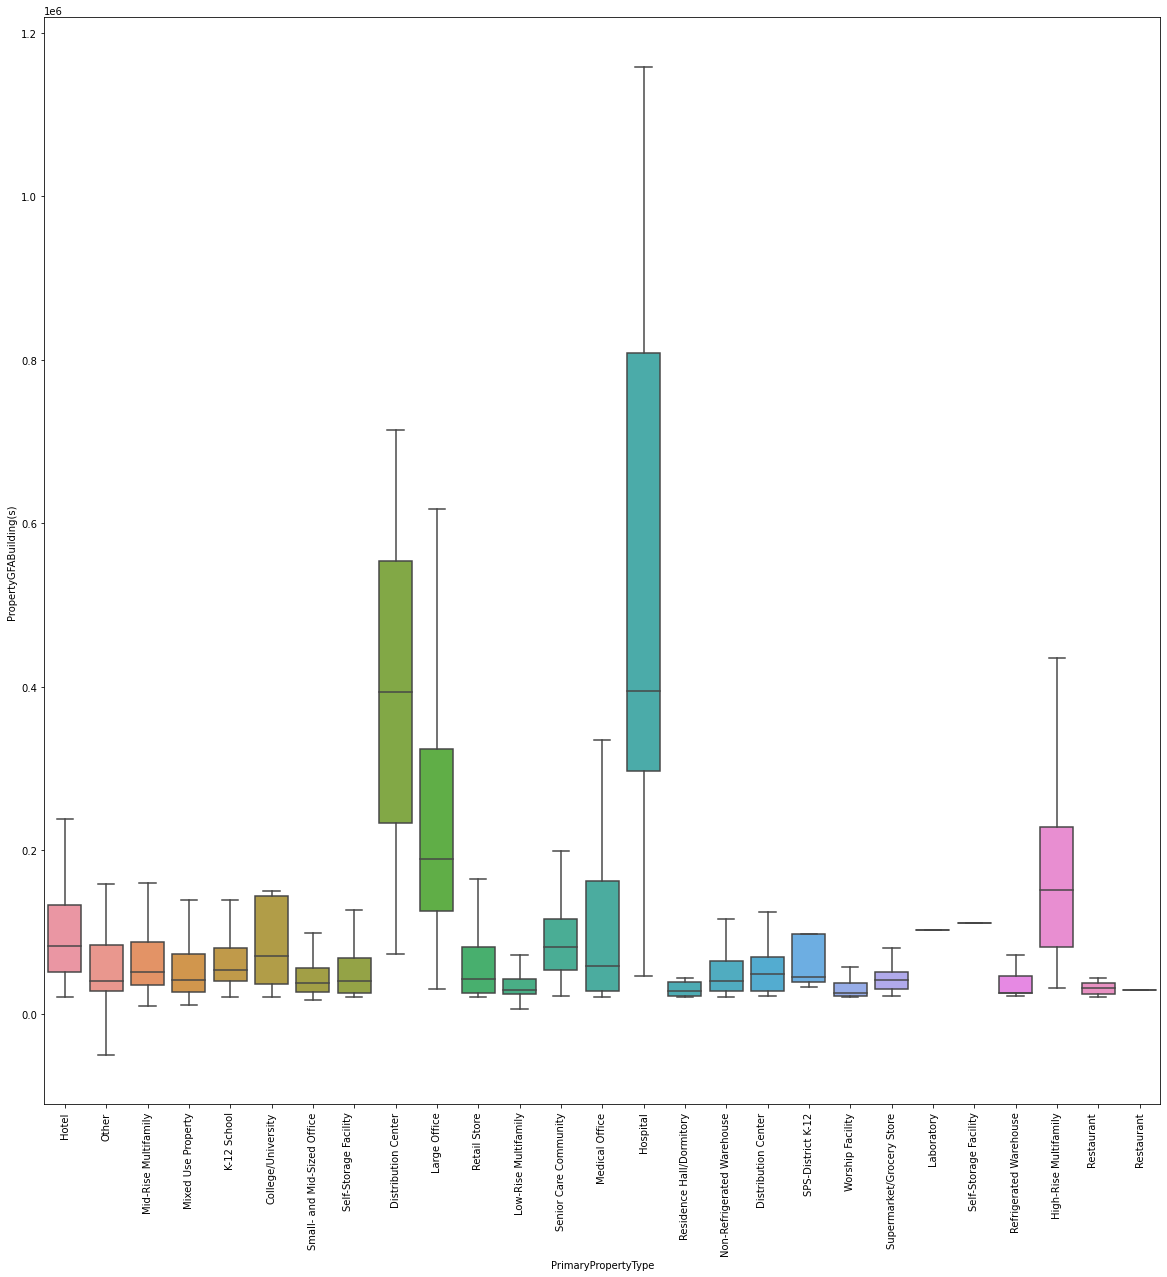

In [31]:
# Distribution de la variables "PropertyGFABuilding(s)"

fig = plt.figure(1, figsize=(20,20))
sns.boxplot(data=data_2015, x="PrimaryPropertyType" , y="PropertyGFABuilding(s)", showfliers=False)
plt.xticks(rotation=90)
plt.show()

#### Sur les boxplots précédents, on constate qu'on a des surfaces négatives, ce qui représente des valeurs abérrantes

In [32]:
data_2015.loc[:,variables_surfaces][data_2015["PropertyGFAParking"]<0]

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
2428,25530,1,5.0,20967,-3,20970,20967.0,NaN,NaN
3136,29551,1,11.0,68452,-2,68454,61665.0,6787.0,NaN


#### On va remplacer cette valeur aberrante par celle du dataset de 2016 correspondant à ce bâtiment 

In [33]:
# Bâtiment N° 25530:
data_2015.loc[data_2015["OSEBuildingID"]==25530]["PropertyGFAParking"]

2428   -3
Name: PropertyGFAParking, dtype: int64

In [34]:
data_2016.loc[:,variables_surfaces][data_2016["OSEBuildingID"]==25530]

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
2400,25530,1.0,5,20967,0,20967,20967.0,NaN,NaN


In [35]:
data_2016.loc[:,variables_surfaces][data_2016["OSEBuildingID"]==29551]

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
3095,29551,1.0,11,68452,0,68452,61665.0,6787.0,NaN


In [36]:
for elt in variables_surfaces[1:]:
    data_2015.loc[data_2015["OSEBuildingID"]==25530, elt]= data_2016[data_2016["OSEBuildingID"]==25530][elt].values

In [37]:
# On fait la même opération pour le bâtiment N° 29551
for elt in variables_surfaces[1:]:
    data_2015.loc[data_2015["OSEBuildingID"]==29551, elt]= data_2016[data_2016["OSEBuildingID"]==29551][elt].values


In [38]:
data_2015.loc[:,variables_surfaces][data_2015["PropertyGFABuilding(s)"]<0]

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
3139,29788,1.0,5.0,54015,97325,-43310,54015.0,NaN,NaN
3322,50002,1.0,3.0,33648,84198,-50550,83600.0,39000.0,NaN


In [39]:
data_2016.loc[:,variables_surfaces][data_2016["OSEBuildingID"]==29788]

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
3098,29788,1.0,5,54015,0,54015,54015.0,NaN,NaN


In [40]:
for elt in variables_surfaces[1:]:
    data_2015.loc[data_2015["OSEBuildingID"]==29788, elt]= data_2016[data_2016["OSEBuildingID"]==29788][elt].values


In [41]:
data_2016.loc[:,variables_surfaces][data_2016["OSEBuildingID"]==50002]

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
3294,50002,1.0,3,33648,0,33648,83600.0,39000.0,NaN


In [42]:
for elt in variables_surfaces[1:]:
    data_2015.loc[data_2015["OSEBuildingID"]==50002, elt]= data_2016[data_2016["OSEBuildingID"]==50002][elt].values

In [43]:
# on a des valeurs négatives sur le dataset 2015 pour les variables : "SourceEUI(kBtu/sf)", "SourceEUIWN(kBtu/sf)"
data_2015.loc[:,variables_énergies].describe()

,OSEBuildingID,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu)
count,3340.000000,3330.000000,3330.000000,3330.000000,3330.000000,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03
mean,20522.168263,53.626126,57.586547,132.779730,138.936036,4.983106e+06,5.203055e+06,2.502851e+05,1.017897e+06,3.473209e+06,1.253304e+04,1.253304e+06
std,11511.515874,53.893311,55.604963,131.943223,131.359121,1.375330e+07,1.400757e+07,3.481900e+06,2.789931e+06,9.519639e+06,4.415142e+04,4.415142e+06
min,1.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,19921.750000,27.300000,29.700000,73.500000,80.300000,9.139300e+05,9.883248e+05,0.000000e+00,1.864908e+05,6.363322e+05,0.000000e+00,0.000000e+00
50%,22977.000000,37.400000,40.900000,95.000000,102.800000,1.776219e+06,1.953996e+06,0.000000e+00,3.400320e+05,1.160236e+06,2.945500e+03,2.945770e+05
75%,25748.000000,59.875000,65.575000,143.900000,151.275000,4.044277e+06,4.368462e+06,0.000000e+00,8.061935e+05,2.750847e+06,1.115325e+04,1.115366e+06
max,50059.000000,800.600000,800.600000,2511.100000,2511.000000,2.958126e+08,2.977410e+08,1.278697e+08,8.344505e+07,2.847263e+08,1.364484e+06,1.364484e+08


In [44]:
data_2015.loc[:,variables_énergies][data_2015["SourceEUI(kBtu/sf)"]<0]

,OSEBuildingID,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu)
3246,49784,11.7,11.7,-2.0,-2.0,562479.0,562479.0,0.0,164853.0,562503.0,0.0,0.0


In [45]:
data_2016.loc[:,variables_énergies][data_2016["OSEBuildingID"]==49784]

,OSEBuildingID,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu)
3206,49784,7.1,5.0,2.0,-2.1,342726.0938,240132.0938,0.0,-33826.80078,-115417.0,0.0,0.0


In [46]:
data_2015.loc[data_2015["OSEBuildingID"]==49784, "SourceEUI(kBtu/sf)"]=0
data_2015.loc[data_2015["OSEBuildingID"]==49784, "SourceEUIWN(kBtu/sf)"]=0

In [47]:
#On a des valeurs abérrantes pour 2016 on remplace la ligne par celle de 2015
for elt in variables_énergies[1:]:
    data_2016.loc[data_2016["OSEBuildingID"]==49784, elt]= data_2015[data_2015["OSEBuildingID"]==49784][elt].values

In [48]:
data_2016.loc[:,variables_surfaces].describe()

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
count,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.356000e+03,1679.000000,596.000000
mean,21208.991114,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.917764e+04,28444.075817,11738.675166
std,12223.757015,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.017034e+05,54392.917928,29331.199286
min,1.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000
25%,19990.750000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,2.509475e+04,5000.000000,2239.000000
50%,23112.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,3.989400e+04,10664.000000,5043.000000
75%,25994.250000,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,7.620025e+04,26640.000000,10138.750000
max,50226.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000


In [49]:
data_2016.loc[:,variables_énergies].describe()

,OSEBuildingID,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu)
count,3376.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03
mean,21208.991114,54.733482,57.035786,134.232254,137.784556,5.403732e+06,5.276821e+06,2.745959e+05,1.086698e+06,3.707814e+06,1.368505e+04,1.368505e+06
std,12223.757015,56.272024,57.161636,139.288122,139.109184,2.161061e+07,1.593876e+07,3.912173e+06,4.352465e+06,1.485061e+07,6.709781e+04,6.709781e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,19990.750000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00
50%,23112.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05
75%,25994.250000,60.400002,64.275002,143.899994,148.349998,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06
max,50226.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08


In [50]:
data_2015.loc[:,variables_énergies][data_2015["OSEBuildingID"]==49784]

,OSEBuildingID,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu)
3246,49784,11.7,11.7,0.0,0.0,562479.0,562479.0,0.0,164853.0,562503.0,0.0,0.0


## Jointure externe des 2 datasets

In [51]:
#Jointure externe compléte des 2 datasets pour consever toutes les informations des 2 datasets.
data = pd.merge(data_2015, data_2016, on='OSEBuildingID', how='outer') 

In [52]:
data

,OSEBuildingID,DataYear_x,BuildingType_x,PrimaryPropertyType_x,PropertyName_x,TaxParcelIdentificationNumber_x,CouncilDistrictCode_x,Neighborhood_x,YearBuilt_x,NumberofBuildings_x,...,Electricity(kWh)_y,Electricity(kBtu)_y,NaturalGas(therms)_y,NaturalGas(kBtu)_y,DefaultData_y,Comments_y,ComplianceStatus_y,Outlier_y,TotalGHGEmissions_y,GHGEmissionsIntensity_y
0,1,2015.0,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7.0,DOWNTOWN,1927.0,1.0,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2015.0,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7.0,DOWNTOWN,1996.0,1.0,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2015.0,NonResidential,Hotel,WESTIN HOTEL,659000475,7.0,DOWNTOWN,1969.0,1.0,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2015.0,NonResidential,Hotel,HOTEL MAX,659000640,7.0,DOWNTOWN,1926.0,1.0,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2015.0,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7.0,DOWNTOWN,1980.0,1.0,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,50222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3428,50223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3429,50224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3430,50225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


In [53]:
data.columns

Index(['OSEBuildingID', 'DataYear_x', 'BuildingType_x',
       'PrimaryPropertyType_x', 'PropertyName_x',
       'TaxParcelIdentificationNumber_x', 'CouncilDistrictCode_x',
       'Neighborhood_x', 'YearBuilt_x', 'NumberofBuildings_x',
       'NumberofFloors_x', 'PropertyGFATotal_x', 'PropertyGFAParking_x',
       'PropertyGFABuilding(s)_x', 'ListOfAllPropertyUseTypes_x',
       'LargestPropertyUseType_x', 'LargestPropertyUseTypeGFA_x',
       'SecondLargestPropertyUseType_x', 'SecondLargestPropertyUseTypeGFA_x',
       'ThirdLargestPropertyUseType_x', 'ThirdLargestPropertyUseTypeGFA_x',
       'YearsENERGYSTARCertified_x', 'ENERGYSTARScore_x', 'SiteEUI(kBtu/sf)_x',
       'SiteEUIWN(kBtu/sf)_x', 'SourceEUI(kBtu/sf)_x',
       'SourceEUIWN(kBtu/sf)_x', 'SiteEnergyUse(kBtu)_x',
       'SiteEnergyUseWN(kBtu)_x', 'SteamUse(kBtu)_x', 'Electricity(kWh)_x',
       'Electricity(kBtu)_x', 'NaturalGas(therms)_x', 'NaturalGas(kBtu)_x',
       'TotalGHGEmissions_x', 'GHGEmissionsIntensity_x', 'De

### On renomme les colonnes avec l'indexe de l'année : x = 2015  et   y = 2016

In [54]:
for i in range(1,46):
    data.rename(columns={data.columns[i]: data.columns[i][:-1]+'2015'+data.columns[i][:0]}, inplace=True)

In [55]:
for i in range(46,len(data.columns)):
      data.rename(columns={data.columns[i]: data.columns[i][:-1]+'2016'+data.columns[i][:0]}, inplace=True)
    

In [56]:
data.columns

Index(['OSEBuildingID', 'DataYear_2015', 'BuildingType_2015',
       'PrimaryPropertyType_2015', 'PropertyName_2015',
       'TaxParcelIdentificationNumber_2015', 'CouncilDistrictCode_2015',
       'Neighborhood_2015', 'YearBuilt_2015', 'NumberofBuildings_2015',
       'NumberofFloors_2015', 'PropertyGFATotal_2015',
       'PropertyGFAParking_2015', 'PropertyGFABuilding(s)_2015',
       'ListOfAllPropertyUseTypes_2015', 'LargestPropertyUseType_2015',
       'LargestPropertyUseTypeGFA_2015', 'SecondLargestPropertyUseType_2015',
       'SecondLargestPropertyUseTypeGFA_2015',
       'ThirdLargestPropertyUseType_2015',
       'ThirdLargestPropertyUseTypeGFA_2015', 'YearsENERGYSTARCertified_2015',
       'ENERGYSTARScore_2015', 'SiteEUI(kBtu/sf)_2015',
       'SiteEUIWN(kBtu/sf)_2015', 'SourceEUI(kBtu/sf)_2015',
       'SourceEUIWN(kBtu/sf)_2015', 'SiteEnergyUse(kBtu)_2015',
       'SiteEnergyUseWN(kBtu)_2015', 'SteamUse(kBtu)_2015',
       'Electricity(kWh)_2015', 'Electricity(kBtu)_2015',

In [57]:
# Pour faciliter notre étude, on définit les identifiants des bâtiments comme index du dataset.
data.set_index('OSEBuildingID', inplace = True)

In [58]:
data.min()

C:\Users\Brahim\AppData\Local\Temp/ipykernel_13384/927168777.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.min()


DataYear_2015                               2015.0
CouncilDistrictCode_2015                       1.0
YearBuilt_2015                              1900.0
NumberofBuildings_2015                         1.0
NumberofFloors_2015                            0.0
PropertyGFATotal_2015                      20000.0
PropertyGFAParking_2015                        0.0
PropertyGFABuilding(s)_2015                 5236.0
LargestPropertyUseTypeGFA_2015              5872.0
SecondLargestPropertyUseTypeGFA_2015           0.0
ThirdLargestPropertyUseTypeGFA_2015            0.0
ENERGYSTARScore_2015                           1.0
SiteEUI(kBtu/sf)_2015                          0.0
SiteEUIWN(kBtu/sf)_2015                        0.0
SourceEUI(kBtu/sf)_2015                        0.0
SourceEUIWN(kBtu/sf)_2015                      0.0
SiteEnergyUse(kBtu)_2015                       0.0
SiteEnergyUseWN(kBtu)_2015                     0.0
SteamUse(kBtu)_2015                            0.0
Electricity(kWh)_2015          

<AxesSubplot:>

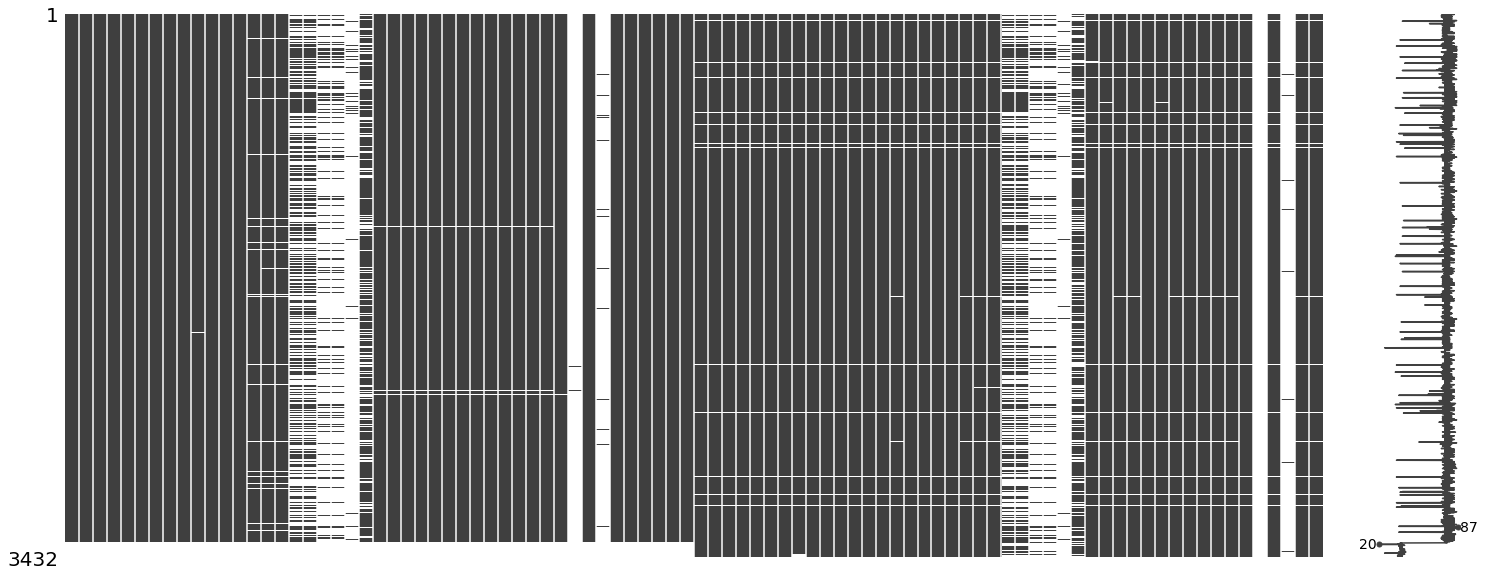

In [59]:
# Import des librairies
import missingno as msno
%matplotlib inline
msno.matrix(data)

<AxesSubplot:>

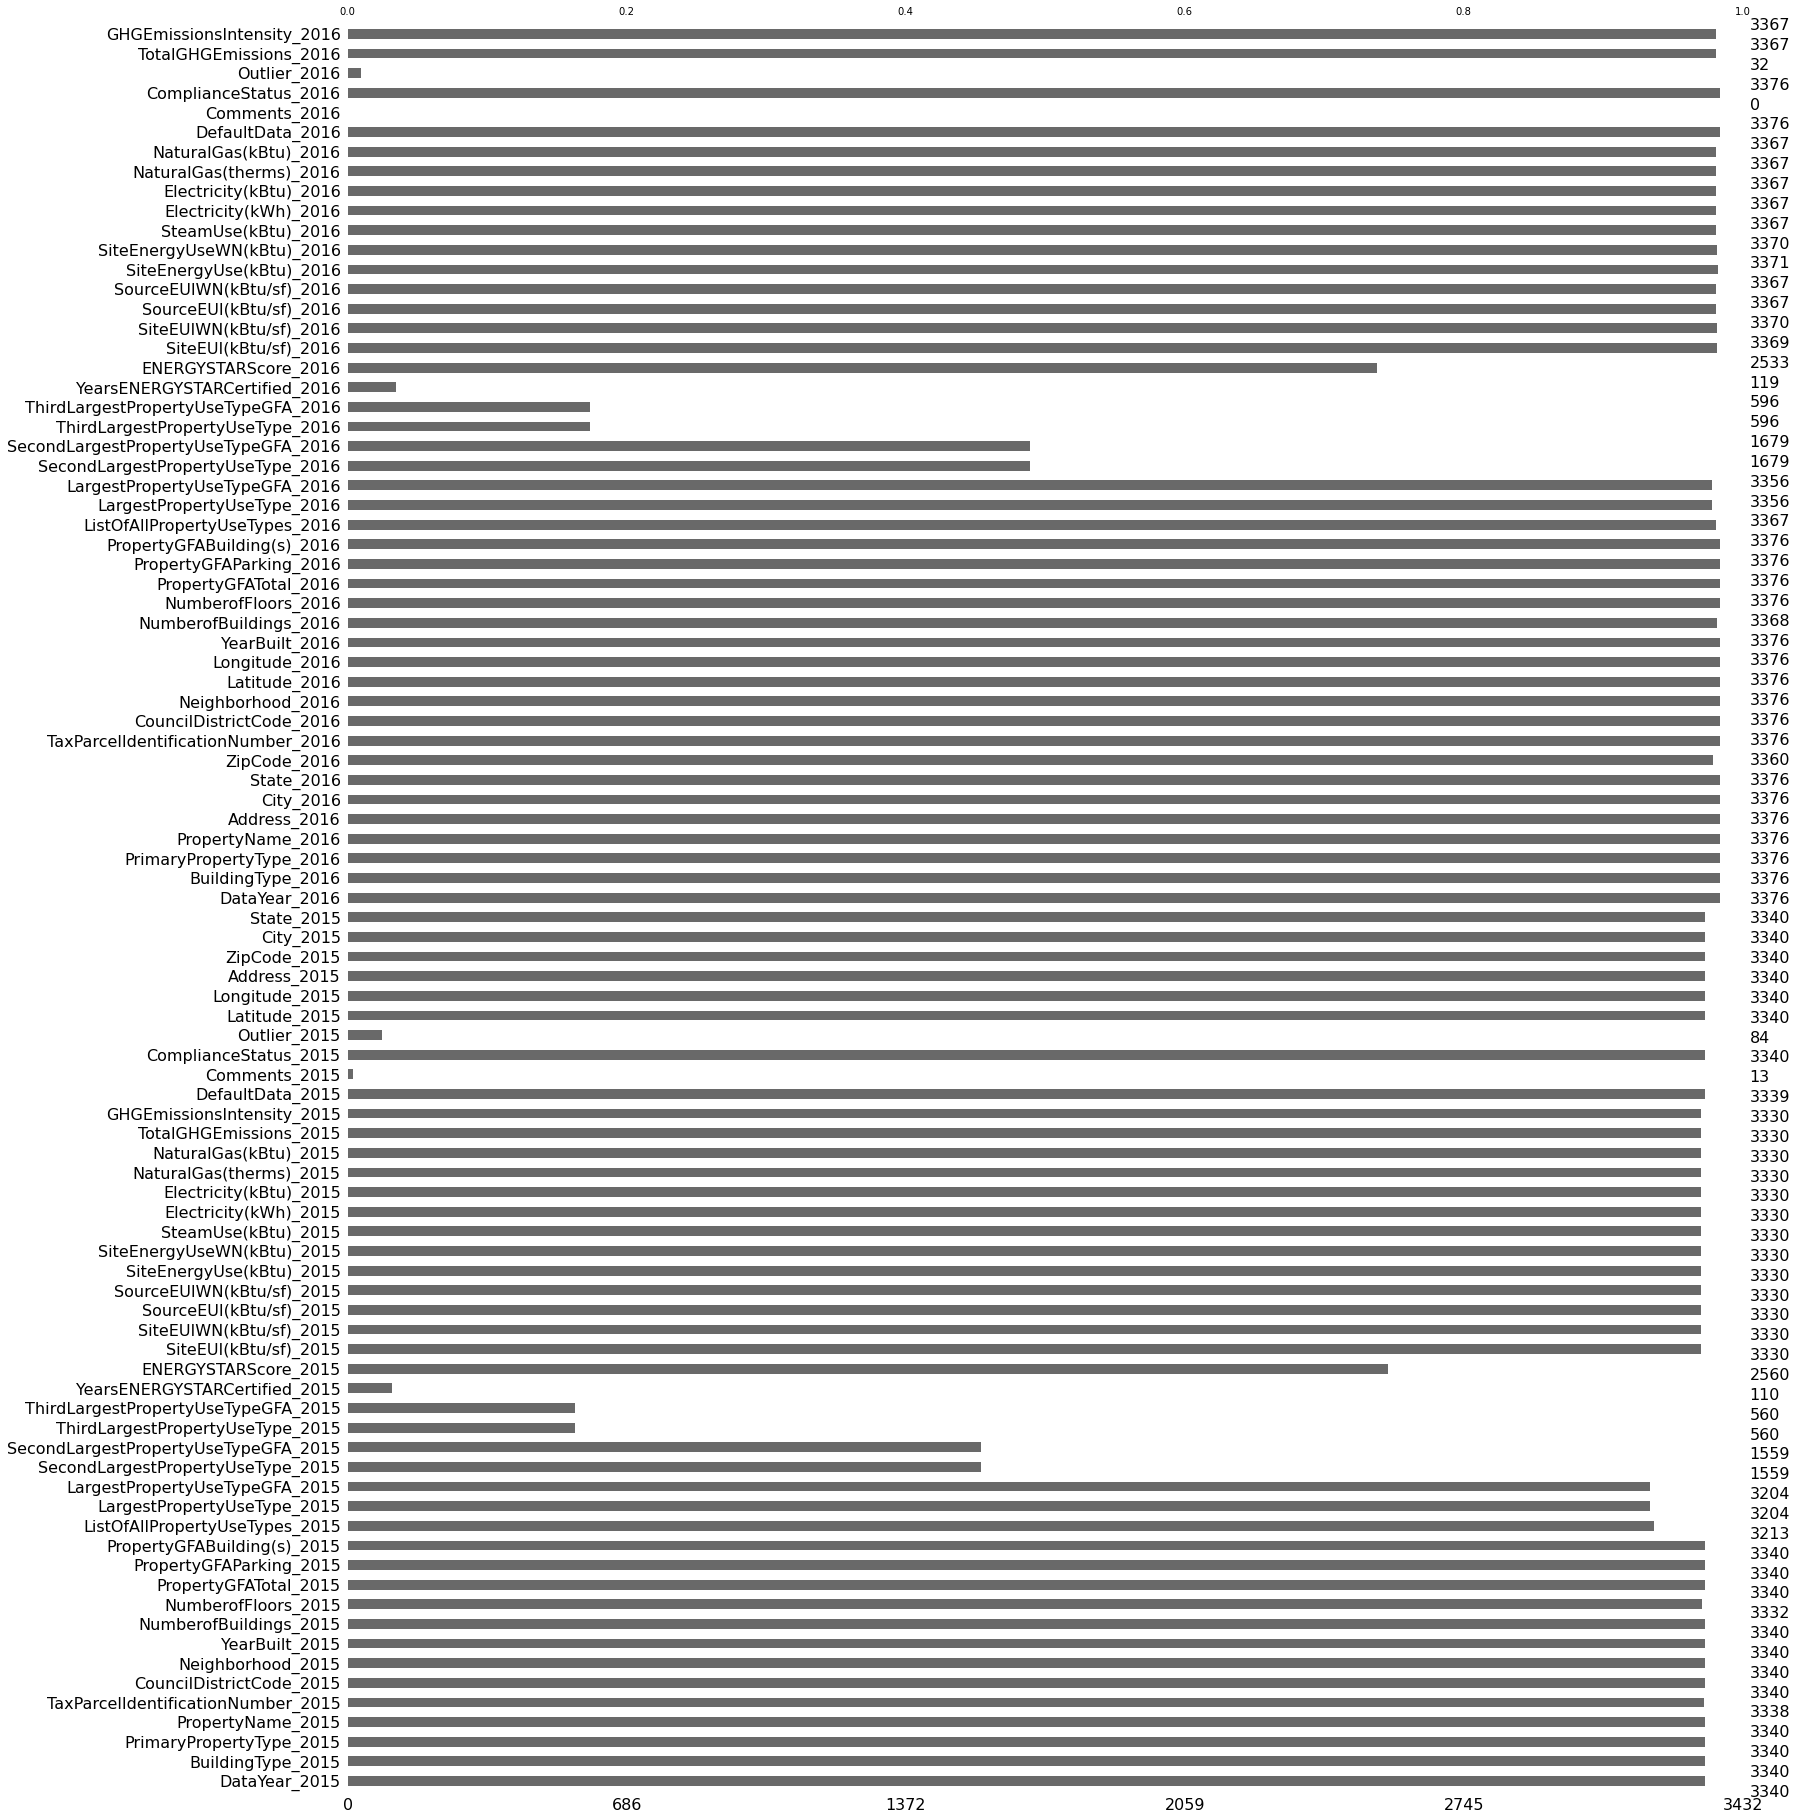

In [60]:
msno.bar(data)

### Suppression d'autres colonnes:

#### Ce sont des colonnes avec beaucoup de valeurs manquantes et des colonnes non utiles à notre étude

In [60]:
data.loc[:,["Comments_2015", "Comments_2016"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3432 entries, 1 to 50226
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Comments_2015  13 non-null     object 
 1   Comments_2016  0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 80.4+ KB


In [61]:
data.drop(columns=["Comments_2015", "Comments_2016"], inplace=True)

In [62]:
data.loc[:,["Outlier_2015", "Outlier_2016"]]

,Outlier_2015,Outlier_2016
OSEBuildingID,,
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,High Outlier,NaN
8,NaN,NaN
...,...,...
50222,NaN,NaN
50223,NaN,NaN
50224,NaN,NaN


In [63]:
data.drop(columns=["Outlier_2015", "Outlier_2016"], inplace=True)

In [64]:
data.loc[:,["YearsENERGYSTARCertified_2015", "YearsENERGYSTARCertified_2016"]]

,YearsENERGYSTARCertified_2015,YearsENERGYSTARCertified_2016
OSEBuildingID,,
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
8,NaN,NaN
...,...,...
50222,NaN,NaN
50223,NaN,NaN
50224,NaN,NaN


In [65]:
data.drop(columns=["YearsENERGYSTARCertified_2015", "YearsENERGYSTARCertified_2016"], inplace=True)

In [66]:
data.loc[:,["ComplianceStatus_2015", "ComplianceStatus_2016"]]

,ComplianceStatus_2015,ComplianceStatus_2016
OSEBuildingID,,
1,Compliant,Compliant
2,Compliant,Compliant
3,Compliant,Compliant
5,Compliant,Compliant
8,Compliant,Compliant
...,...,...
50222,NaN,Error - Correct Default Data
50223,NaN,Compliant
50224,NaN,Compliant


In [67]:
data.drop(columns=["ComplianceStatus_2015", "ComplianceStatus_2016"], inplace=True)

In [68]:
data.drop(columns=["TaxParcelIdentificationNumber_2015", "TaxParcelIdentificationNumber_2016", "CouncilDistrictCode_2015", "CouncilDistrictCode_2016"], inplace=True)

#### Suppression des colonnes avec une information unique ("State", "City", "DataYear")

In [69]:
data = data.drop(["State_2015", "State_2016","City_2015", "City_2016", "DataYear_2015", "DataYear_2016", 'DefaultData_2015', 'DefaultData_2016'], axis=1)

Dans le dataset data qui rassemble les données des 2 années, nous allons définr des colonnes qui synthétisent les données des 2 années. Ces colonnes n'auront plus d'index années.
Cela se fera au cas par cas.

In [70]:
data.columns.tolist()

['BuildingType_2015',
 'PrimaryPropertyType_2015',
 'PropertyName_2015',
 'Neighborhood_2015',
 'YearBuilt_2015',
 'NumberofBuildings_2015',
 'NumberofFloors_2015',
 'PropertyGFATotal_2015',
 'PropertyGFAParking_2015',
 'PropertyGFABuilding(s)_2015',
 'ListOfAllPropertyUseTypes_2015',
 'LargestPropertyUseType_2015',
 'LargestPropertyUseTypeGFA_2015',
 'SecondLargestPropertyUseType_2015',
 'SecondLargestPropertyUseTypeGFA_2015',
 'ThirdLargestPropertyUseType_2015',
 'ThirdLargestPropertyUseTypeGFA_2015',
 'ENERGYSTARScore_2015',
 'SiteEUI(kBtu/sf)_2015',
 'SiteEUIWN(kBtu/sf)_2015',
 'SourceEUI(kBtu/sf)_2015',
 'SourceEUIWN(kBtu/sf)_2015',
 'SiteEnergyUse(kBtu)_2015',
 'SiteEnergyUseWN(kBtu)_2015',
 'SteamUse(kBtu)_2015',
 'Electricity(kWh)_2015',
 'Electricity(kBtu)_2015',
 'NaturalGas(therms)_2015',
 'NaturalGas(kBtu)_2015',
 'TotalGHGEmissions_2015',
 'GHGEmissionsIntensity_2015',
 'Latitude_2015',
 'Longitude_2015',
 'Address_2015',
 'ZipCode_2015',
 'BuildingType_2016',
 'PrimaryPro

In [71]:
variables_des_2années = ['BuildingType_2015','PrimaryPropertyType_2015','PropertyName_2015','Neighborhood_2015','YearBuilt_2015',
 'NumberofBuildings_2015','NumberofFloors_2015','PropertyGFATotal_2015','PropertyGFAParking_2015','PropertyGFABuilding(s)_2015',
 'ListOfAllPropertyUseTypes_2015','LargestPropertyUseType_2015','LargestPropertyUseTypeGFA_2015','SecondLargestPropertyUseType_2015',
 'SecondLargestPropertyUseTypeGFA_2015','ThirdLargestPropertyUseType_2015','ThirdLargestPropertyUseTypeGFA_2015','ENERGYSTARScore_2015',
 'SiteEUI(kBtu/sf)_2015','SiteEUIWN(kBtu/sf)_2015','SourceEUI(kBtu/sf)_2015','SourceEUIWN(kBtu/sf)_2015','SiteEnergyUse(kBtu)_2015',
 'SiteEnergyUseWN(kBtu)_2015','SteamUse(kBtu)_2015','Electricity(kWh)_2015','Electricity(kBtu)_2015','NaturalGas(therms)_2015',
 'NaturalGas(kBtu)_2015','TotalGHGEmissions_2015','GHGEmissionsIntensity_2015','Latitude_2015','Longitude_2015',
 'Address_2015','ZipCode_2015',
 
 'BuildingType_2016','PrimaryPropertyType_2016','PropertyName_2016','Neighborhood_2016','YearBuilt_2016',
 'NumberofBuildings_2016','NumberofFloors_2016','PropertyGFATotal_2016','PropertyGFAParking_2016','PropertyGFABuilding(s)_2016',
 'ListOfAllPropertyUseTypes_2016','LargestPropertyUseType_2016','LargestPropertyUseTypeGFA_2016','SecondLargestPropertyUseType_2016',
 'SecondLargestPropertyUseTypeGFA_2016','ThirdLargestPropertyUseType_2016','ThirdLargestPropertyUseTypeGFA_2016','ENERGYSTARScore_2016',
 'SiteEUI(kBtu/sf)_2016','SiteEUIWN(kBtu/sf)_2016','SourceEUI(kBtu/sf)_2016','SourceEUIWN(kBtu/sf)_2016','SiteEnergyUse(kBtu)_2016',
 'SiteEnergyUseWN(kBtu)_2016','SteamUse(kBtu)_2016','Electricity(kWh)_2016','Electricity(kBtu)_2016','NaturalGas(therms)_2016',
 'NaturalGas(kBtu)_2016','TotalGHGEmissions_2016','GHGEmissionsIntensity_2016','Latitude_2016','Longitude_2016',
 'Address_2016','ZipCode_2016']


In [72]:
len(variables_des_2années)

70

In [73]:
for i in range(len(variables_des_2années[:35])):
    print((variables_des_2années[:35][i],variables_des_2années[35:][i]))

('BuildingType_2015', 'BuildingType_2016')
('PrimaryPropertyType_2015', 'PrimaryPropertyType_2016')
('PropertyName_2015', 'PropertyName_2016')
('Neighborhood_2015', 'Neighborhood_2016')
('YearBuilt_2015', 'YearBuilt_2016')
('NumberofBuildings_2015', 'NumberofBuildings_2016')
('NumberofFloors_2015', 'NumberofFloors_2016')
('PropertyGFATotal_2015', 'PropertyGFATotal_2016')
('PropertyGFAParking_2015', 'PropertyGFAParking_2016')
('PropertyGFABuilding(s)_2015', 'PropertyGFABuilding(s)_2016')
('ListOfAllPropertyUseTypes_2015', 'ListOfAllPropertyUseTypes_2016')
('LargestPropertyUseType_2015', 'LargestPropertyUseType_2016')
('LargestPropertyUseTypeGFA_2015', 'LargestPropertyUseTypeGFA_2016')
('SecondLargestPropertyUseType_2015', 'SecondLargestPropertyUseType_2016')
('SecondLargestPropertyUseTypeGFA_2015', 'SecondLargestPropertyUseTypeGFA_2016')
('ThirdLargestPropertyUseType_2015', 'ThirdLargestPropertyUseType_2016')
('ThirdLargestPropertyUseTypeGFA_2015', 'ThirdLargestPropertyUseTypeGFA_2016')

In [74]:
# Variables pour l'année 2015
variables_des_2années[:35]

['BuildingType_2015',
 'PrimaryPropertyType_2015',
 'PropertyName_2015',
 'Neighborhood_2015',
 'YearBuilt_2015',
 'NumberofBuildings_2015',
 'NumberofFloors_2015',
 'PropertyGFATotal_2015',
 'PropertyGFAParking_2015',
 'PropertyGFABuilding(s)_2015',
 'ListOfAllPropertyUseTypes_2015',
 'LargestPropertyUseType_2015',
 'LargestPropertyUseTypeGFA_2015',
 'SecondLargestPropertyUseType_2015',
 'SecondLargestPropertyUseTypeGFA_2015',
 'ThirdLargestPropertyUseType_2015',
 'ThirdLargestPropertyUseTypeGFA_2015',
 'ENERGYSTARScore_2015',
 'SiteEUI(kBtu/sf)_2015',
 'SiteEUIWN(kBtu/sf)_2015',
 'SourceEUI(kBtu/sf)_2015',
 'SourceEUIWN(kBtu/sf)_2015',
 'SiteEnergyUse(kBtu)_2015',
 'SiteEnergyUseWN(kBtu)_2015',
 'SteamUse(kBtu)_2015',
 'Electricity(kWh)_2015',
 'Electricity(kBtu)_2015',
 'NaturalGas(therms)_2015',
 'NaturalGas(kBtu)_2015',
 'TotalGHGEmissions_2015',
 'GHGEmissionsIntensity_2015',
 'Latitude_2015',
 'Longitude_2015',
 'Address_2015',
 'ZipCode_2015']

In [75]:
# Variables pour l'année 2016
variables_des_2années[35:]

['BuildingType_2016',
 'PrimaryPropertyType_2016',
 'PropertyName_2016',
 'Neighborhood_2016',
 'YearBuilt_2016',
 'NumberofBuildings_2016',
 'NumberofFloors_2016',
 'PropertyGFATotal_2016',
 'PropertyGFAParking_2016',
 'PropertyGFABuilding(s)_2016',
 'ListOfAllPropertyUseTypes_2016',
 'LargestPropertyUseType_2016',
 'LargestPropertyUseTypeGFA_2016',
 'SecondLargestPropertyUseType_2016',
 'SecondLargestPropertyUseTypeGFA_2016',
 'ThirdLargestPropertyUseType_2016',
 'ThirdLargestPropertyUseTypeGFA_2016',
 'ENERGYSTARScore_2016',
 'SiteEUI(kBtu/sf)_2016',
 'SiteEUIWN(kBtu/sf)_2016',
 'SourceEUI(kBtu/sf)_2016',
 'SourceEUIWN(kBtu/sf)_2016',
 'SiteEnergyUse(kBtu)_2016',
 'SiteEnergyUseWN(kBtu)_2016',
 'SteamUse(kBtu)_2016',
 'Electricity(kWh)_2016',
 'Electricity(kBtu)_2016',
 'NaturalGas(therms)_2016',
 'NaturalGas(kBtu)_2016',
 'TotalGHGEmissions_2016',
 'GHGEmissionsIntensity_2016',
 'Latitude_2016',
 'Longitude_2016',
 'Address_2016',
 'ZipCode_2016']

In [76]:
variables_finales=['BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Neighborhood',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'Latitude',
 'Longitude',
 'Address',
 'ZipCode']

In [77]:
for i in range(len(variables_des_2années[:35])):
    print((variables_des_2années[:35][i], variables_des_2années[35:][i]), variables_finales[i])

('BuildingType_2015', 'BuildingType_2016') BuildingType
('PrimaryPropertyType_2015', 'PrimaryPropertyType_2016') PrimaryPropertyType
('PropertyName_2015', 'PropertyName_2016') PropertyName
('Neighborhood_2015', 'Neighborhood_2016') Neighborhood
('YearBuilt_2015', 'YearBuilt_2016') YearBuilt
('NumberofBuildings_2015', 'NumberofBuildings_2016') NumberofBuildings
('NumberofFloors_2015', 'NumberofFloors_2016') NumberofFloors
('PropertyGFATotal_2015', 'PropertyGFATotal_2016') PropertyGFATotal
('PropertyGFAParking_2015', 'PropertyGFAParking_2016') PropertyGFAParking
('PropertyGFABuilding(s)_2015', 'PropertyGFABuilding(s)_2016') PropertyGFABuilding(s)
('ListOfAllPropertyUseTypes_2015', 'ListOfAllPropertyUseTypes_2016') ListOfAllPropertyUseTypes
('LargestPropertyUseType_2015', 'LargestPropertyUseType_2016') LargestPropertyUseType
('LargestPropertyUseTypeGFA_2015', 'LargestPropertyUseTypeGFA_2016') LargestPropertyUseTypeGFA
('SecondLargestPropertyUseType_2015', 'SecondLargestPropertyUseType_201

### Remplacement de certaines valeurs manquantes

Remplacement de quelques valeurs manquantes.
Les colonnes 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType' et 'ThirdLargestPropertyUseTypeGFA' contiennent beaucoup de valeurs manquantes. On considère que les bâtiments dont les valeurs sont manquantes pour ces variables ne possèdent pas de deuxième et troisième utilisation donc on ajoute une catégorie aux types d'utilisation et on remplace les valeurs de surface par 0.

In [78]:
# Les valeurs manquantes sont remplacés par une catégorie supplémentaire
data["SecondLargestPropertyUseType_2015"].fillna("Nothing", inplace=True)
data["SecondLargestPropertyUseType_2016"].fillna("Nothing", inplace=True)

# Les valeurs manquantes sont remplacés par 0
data["SecondLargestPropertyUseTypeGFA_2015"].fillna(0, inplace=True)
data["SecondLargestPropertyUseTypeGFA_2016"].fillna(0, inplace=True)

In [79]:
# Les valeurs manquantes sont remplacés par une catégorie supplémentaire
data["ThirdLargestPropertyUseType_2015"].fillna("Nothing", inplace=True)
data["ThirdLargestPropertyUseType_2016"].fillna("Nothing", inplace=True)

# Les valeurs manquantes sont remplacés par 0
data["ThirdLargestPropertyUseTypeGFA_2015"].fillna(0, inplace=True)
data["ThirdLargestPropertyUseTypeGFA_2016"].fillna(0, inplace=True)


#### Nous avons un certain nombre de bâtiments présents uniquement dans le relevé de 2015 et d'autres uniquement dans le relevé de 2016.
#### Pour ces bâtiments, toutes leur données vont être conservées telles quelles dans ces nouvelles colonnes( variables_finales ).

In [80]:
# Liste des bâtiments du relevé de 2015 non relevé en 2016:
ident_specifque_a_2015 = [elt for elt in data_2015["OSEBuildingID"].values if elt not in data_2016["OSEBuildingID"].values]

# Liste des bâtiments du relevé de 2016 non relevé en 2015:
ident_specifque_a_2016 = [elt for elt in data_2016["OSEBuildingID"].values if elt not in data_2015["OSEBuildingID"].values]

In [81]:
# Conservation des donneés des bâtiments uniquement présents dans le data_2015:
for i in ident_specifque_a_2015:
    for j in range(len(variables_finales)):
         data.loc[i,variables_finales[j]] = data.loc[i,variables_des_2années[:35][j]]

In [82]:
# Conservation des donneés des bâtiments uniquement présents dans le data_2016:
for i in ident_specifque_a_2016:
    for j in range(len(variables_finales)):
         data.loc[i,variables_finales[j]] = data.loc[i,variables_des_2années[35:][j]]

In [83]:
(data["NaturalGas(kBtu)_2015"] - data["NaturalGas(kBtu)_2016"])*100/data["NaturalGas(kBtu)_2015"]

OSEBuildingID
1        -0.319478
2       -15.646198
3        59.734764
5         9.525030
8        -0.466650
           ...    
50222          NaN
50223          NaN
50224          NaN
50225          NaN
50226          NaN
Length: 3432, dtype: float64

In [84]:
data.columns

Index(['BuildingType_2015', 'PrimaryPropertyType_2015', 'PropertyName_2015',
       'Neighborhood_2015', 'YearBuilt_2015', 'NumberofBuildings_2015',
       'NumberofFloors_2015', 'PropertyGFATotal_2015',
       'PropertyGFAParking_2015', 'PropertyGFABuilding(s)_2015',
       ...
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'Latitude', 'Longitude', 'Address', 'ZipCode'],
      dtype='object', length=105)

In [85]:
# Liste des variables indiquant les différentes mesures de consommations en énérgies(en éléctricité, en gaz, en vapeurs, consommation totale etc.)

variables_énergies_2015_2016 = ['SiteEUI(kBtu/sf)_2015','SiteEUI(kBtu/sf)_2016',
       'SiteEUIWN(kBtu/sf)_2015','SiteEUIWN(kBtu/sf)_2016',
        'SourceEUI(kBtu/sf)_2015','SourceEUI(kBtu/sf)_2016',
       'SourceEUIWN(kBtu/sf)_2015','SourceEUIWN(kBtu/sf)_2016',
        'SiteEnergyUse(kBtu)_2015','SiteEnergyUse(kBtu)_2016',
       'SiteEnergyUseWN(kBtu)_2015','SiteEnergyUseWN(kBtu)_2016',
        'SteamUse(kBtu)_2015','SteamUse(kBtu)_2016',
       'Electricity(kWh)_2015', 'Electricity(kWh)_2016',
        'Electricity(kBtu)_2015','Electricity(kBtu)_2016',
       'NaturalGas(therms)_2015', 'NaturalGas(therms)_2016',
        'NaturalGas(kBtu)_2015','NaturalGas(kBtu)_2016']

# Liste des variables indiquant les mesures des émissions des gaz à effet de serre (GES):

variables_émissions_ges_2015_2016 = ['TotalGHGEmissions_2015', 'TotalGHGEmissions_2016',
        'GHGEmissionsIntensity_2015', 'GHGEmissionsIntensity_2016']

In [86]:
len(variables_énergies_2015_2016)

22

In [87]:
len(variables_émissions_ges_2015_2016)

4

## Compraraison des colonnes et traitement des valeurs manquantes

In [88]:
data.columns[:90]

Index(['BuildingType_2015', 'PrimaryPropertyType_2015', 'PropertyName_2015',
       'Neighborhood_2015', 'YearBuilt_2015', 'NumberofBuildings_2015',
       'NumberofFloors_2015', 'PropertyGFATotal_2015',
       'PropertyGFAParking_2015', 'PropertyGFABuilding(s)_2015',
       'ListOfAllPropertyUseTypes_2015', 'LargestPropertyUseType_2015',
       'LargestPropertyUseTypeGFA_2015', 'SecondLargestPropertyUseType_2015',
       'SecondLargestPropertyUseTypeGFA_2015',
       'ThirdLargestPropertyUseType_2015',
       'ThirdLargestPropertyUseTypeGFA_2015', 'ENERGYSTARScore_2015',
       'SiteEUI(kBtu/sf)_2015', 'SiteEUIWN(kBtu/sf)_2015',
       'SourceEUI(kBtu/sf)_2015', 'SourceEUIWN(kBtu/sf)_2015',
       'SiteEnergyUse(kBtu)_2015', 'SiteEnergyUseWN(kBtu)_2015',
       'SteamUse(kBtu)_2015', 'Electricity(kWh)_2015',
       'Electricity(kBtu)_2015', 'NaturalGas(therms)_2015',
       'NaturalGas(kBtu)_2015', 'TotalGHGEmissions_2015',
       'GHGEmissionsIntensity_2015', 'Latitude_2015', 'Longit

In [89]:
# Liste des bâtiments communs aux 2 datasets data_2015 et data_2016:
ident_communs_aux_2_datsets = [elt for elt in data_2016["OSEBuildingID"].values if elt in data_2016["OSEBuildingID"].values]

In [91]:
comparaison = np.where( data['PrimaryPropertyType_2015'] == data['PrimaryPropertyType_2016'] , 1, 0)
(comparaison==0).sum()

535

### Comparaison des variables "PrimaryPropertyType_2015" et "PrimaryPropertyType_2016".
#### On a 535 bâtiments pour lesquels, on a des différences au niveau de la première activité du bâtiment.
#### Mais après exploration, on constate que sur les lignes sans données manquantes, l'activité est la même mais c'est juste une différence au niveau de l'intitulé.

In [92]:
data['PrimaryPropertyType_2015'][50222]

nan

In [93]:
for i in (ident_communs_aux_2_datsets):
    if data['PrimaryPropertyType_2015'][i]!=data['PrimaryPropertyType_2016'][i]:
        print(i,(data['PrimaryPropertyType_2015'][i], data['PrimaryPropertyType_2016'][i]))
        

30 ('College/University', 'University')
41 ('Self-Storage Facility\n', 'Self-Storage Facility')
43 (nan, 'Mixed Use Property')
46 ('Distribution Center', 'Warehouse')
55 ('Self-Storage Facility\n', 'Self-Storage Facility')
58 ('Retail Store', 'Other')
170 ('College/University', 'University')
172 ('College/University', 'University')
182 ('College/University', 'University')
183 ('Residence Hall/Dormitory', 'Residence Hall')
209 ('Self-Storage Facility\n', 'Self-Storage Facility')
211 ('College/University', 'University')
215 ('Non-Refrigerated Warehouse', 'Warehouse')
220 ('Non-Refrigerated Warehouse', 'Warehouse')
230 ('Self-Storage Facility\n', 'Self-Storage Facility')
234 ('Non-Refrigerated Warehouse', 'Warehouse')
247 ('Distribution Center\n', 'Distribution Center')
248 ('Non-Refrigerated Warehouse', 'Warehouse')
257 ('Non-Refrigerated Warehouse', 'Warehouse')
260 ('SPS-District K-12', 'K-12 School')
274 ('Non-Refrigerated Warehouse', 'Warehouse')
294 ('Residence Hall/Dormitory', 'Res

In [94]:
# On garde la colonne 2016 qui a moins de valeurs manquantes
for i in ident_communs_aux_2_datsets:
    data.loc[i:,"PrimaryPropertyType"] = data.loc[i:,"PrimaryPropertyType_2016"]


## Comparaison des variables "PropertyName_2015" et "PropertyName_2016".
#### On a 3310 bâtiments pour lesquels, on a des différences au niveau du nom de  l'exploitant du bâtiment.
#### Mais après exploration, on constate que sur les lignes sans données manquantes, l'exploitant est le même mais c'est juste une différence au niveau de l'intitulé.

In [95]:
comparaison = np.where( data['PropertyName_2015'] == data['PropertyName_2016'] , 1, 0)
(comparaison==0).sum()

3310

In [96]:
for i in (ident_communs_aux_2_datsets):
    if data['PropertyName_2015'][i]!=data['PropertyName_2016'][i]:
        print(i,(data['PropertyName_2015'][i], data['PropertyName_2016'][i]))

1 ('MAYFLOWER PARK HOTEL', 'Mayflower park hotel')
2 ('PARAMOUNT HOTEL', 'Paramount Hotel')
3 ('WESTIN HOTEL', '5673-The Westin Seattle')
8 ('WARWICK SEATTLE HOTEL', 'WARWICK SEATTLE HOTEL (ID8)')
9 ('WEST PRECINCT (SEATTLE POLICE)', 'West Precinct')
10 ('CAMLIN WORLDMARK HOTEL', 'Camlin')
11 ('PARAMOUNT THEATER', 'Paramount Theatre')
12 ('COURTYARD BY MARRIOTT - ALASKA BLDG SEATTLE', '311wh-Pioneer Square')
13 ('LYON BUILDING', 'Lyon Building')
15 ('HOTEL MONACO', 'Hotel Monaco Seattle')
16 ('W SEATTLE HOTEL', '5679-W Seattle')
17 ('EXECUTIVE PACIFIC PLAZA', 'Executive Pacific Plaza')
18 ('CROWNE PLAZA', 'Crowne Plaza Hotel Seattle')
19 ('HOTEL VINTAGE PARK', 'Hotel Vintage Seattle')
21 ('SEATTLE CENTRAL LIBRARY', 'The Seattle Public Library - Central Library')
22 ('DOWNTOWN SEATTLE YMCA', 'Downtown Seattle YMCA')
23 ('RENAISSANCE MADISON HOTEL', 'Renaissance Seattle Hotel')
24 ('RAINIER CLUB (HISTORICAL LANDMARK)', 'The Rainier Club')
25 ('DOUBLE TREE ARCTIC CLUB HOTEL - SEATTLE', 'A

In [97]:
# On garde la colonne 2016 qui a moins de valeurs manquantes
for i in ident_communs_aux_2_datsets:
    data.loc[i:,"PropertyName"] = data.loc[i:,"PropertyName_2016"]

In [98]:
compa = np.where( data['NumberofBuildings_2015'] == data['NumberofBuildings_2016'] , 1, 0)
(compa==0).sum()

340

In [99]:
for i in (ident_communs_aux_2_datsets):
    if data['NumberofBuildings_2015'][i]!=data['NumberofBuildings_2016'][i]:
        print(i,(data['NumberofBuildings_2015'][i], data['NumberofBuildings_2016'][i]))

43 (nan, 1.0)
46 (7.0, 3.0)
89 (1.0, 0.0)
113 (1.0, 0.0)
117 (1.0, 2.0)
147 (1.0, 4.0)
172 (1.0, 27.0)
187 (1.0, 3.0)
198 (1.0, 6.0)
257 (1.0, 0.0)
261 (16.0, 14.0)
268 (1.0, 6.0)
276 (1.0, 9.0)
322 (1.0, 0.0)
364 (nan, 1.0)
365 (nan, 1.0)
366 (1.0, 0.0)
391 (1.0, 0.0)
408 (1.0, 0.0)
410 (1.0, 0.0)
421 (1.0, 0.0)
432 (1.0, 3.0)
456 (1.0, 2.0)
477 (3.0, 1.0)
496 (1.0, 2.0)
504 (1.0, 0.0)
516 (1.0, 6.0)
517 (1.0, 0.0)
576 (1.0, 0.0)
588 (1.0, 0.0)
594 (1.0, 0.0)
608 (1.0, 5.0)
624 (1.0, 2.0)
640 (1.0, 0.0)
649 (1.0, 0.0)
657 (1.0, 0.0)
673 (1.0, 0.0)
683 (1.0, 3.0)
689 (1.0, 3.0)
731 (1.0, 3.0)
735 (1.0, 0.0)
750 (nan, 1.0)
773 (1.0, nan)
812 (1.0, 0.0)
828 (1.0, 7.0)
829 (1.0, 3.0)
851 (1.0, 2.0)
19456 (nan, 5.0)
19491 (1.0, 3.0)
19533 (1.0, 0.0)
19741 (1.0, 0.0)
19798 (1.0, nan)
19835 (1.0, 0.0)
19900 (1.0, 0.0)
19969 (1.0, 0.0)
20066 (1.0, 2.0)
20095 (1.0, 4.0)
20140 (1.0, 4.0)
20186 (1.0, 0.0)
20323 (1.0, 0.0)
20325 (1.0, 5.0)
20340 (1.0, 4.0)
20350 (1.0, 2.0)
20403 (1.0, 0.0)
20427 

In [100]:
# On garde la colonne 2016 qui a moins de valeurs manquantes
for i in (ident_communs_aux_2_datsets):
    data.loc[i:,"NumberofBuildings"] = data.loc[i:,"NumberofBuildings_2016"]

In [101]:
for i in (ident_communs_aux_2_datsets):
    if data.loc[i:,"NumberofBuildings"].isnull()[i]==True:
        data.loc[i:,"NumberofBuildings"] = data.loc[i:,"NumberofBuildings_2015"]

In [102]:
data.loc[:,["PrimaryPropertyType_2015", "PrimaryPropertyType_2016"]]

,PrimaryPropertyType_2015,PrimaryPropertyType_2016
OSEBuildingID,,
1,Hotel,Hotel
2,Hotel,Hotel
3,Hotel,Hotel
5,Hotel,Hotel
8,Hotel,Hotel
...,...,...
50222,NaN,Office
50223,NaN,Other
50224,NaN,Other


#### Pour les autres variables liées aux caractéristiques des batiments le raisonnement est le même

In [103]:
variables_caractéristiques_batiment_2016 = [ 'BuildingType_2016', 'PrimaryPropertyType_2016',
       'PropertyName_2016', 'Neighborhood_2016', 'YearBuilt_2016',
       'NumberofBuildings_2016','NumberofFloors_2016', 'PropertyGFATotal_2016', 'PropertyGFAParking_2016',
       'PropertyGFABuilding(s)_2016', 'ListOfAllPropertyUseTypes_2016','LargestPropertyUseType_2016',
       'LargestPropertyUseTypeGFA_2016','SecondLargestPropertyUseType_2016','SecondLargestPropertyUseTypeGFA_2016',
       'ThirdLargestPropertyUseType_2016','ThirdLargestPropertyUseTypeGFA_2016','ENERGYSTARScore_2016','Latitude_2016',
       'Longitude_2016', 'Address_2016', 'ZipCode_2016']

In [104]:
variables_caractéristiques_batiment = ['BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Neighborhood', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors','PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes','LargestPropertyUseType',
       'LargestPropertyUseTypeGFA','SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA','ENERGYSTARScore', 'Latitude',
       'Longitude', 'Address', 'ZipCode']

#### Pour les bâtiments communs aux 2 datasets, on conserve les données de 2016 sur les caractéristques du batiments hors consommations d'énergies et émmissions de CO2. Il n'y a pas de changements à ce niveau

In [105]:
for i in ident_communs_aux_2_datsets:
    for j in range(len(variables_caractéristiques_batiment)):
        data.loc[i,variables_caractéristiques_batiment[j]] = data.loc[i,variables_caractéristiques_batiment_2016[j]]

In [106]:
# liste des variables de consommations en énérgies pour les 2 années:
variables_énergies_2015_2016  

['SiteEUI(kBtu/sf)_2015',
 'SiteEUI(kBtu/sf)_2016',
 'SiteEUIWN(kBtu/sf)_2015',
 'SiteEUIWN(kBtu/sf)_2016',
 'SourceEUI(kBtu/sf)_2015',
 'SourceEUI(kBtu/sf)_2016',
 'SourceEUIWN(kBtu/sf)_2015',
 'SourceEUIWN(kBtu/sf)_2016',
 'SiteEnergyUse(kBtu)_2015',
 'SiteEnergyUse(kBtu)_2016',
 'SiteEnergyUseWN(kBtu)_2015',
 'SiteEnergyUseWN(kBtu)_2016',
 'SteamUse(kBtu)_2015',
 'SteamUse(kBtu)_2016',
 'Electricity(kWh)_2015',
 'Electricity(kWh)_2016',
 'Electricity(kBtu)_2015',
 'Electricity(kBtu)_2016',
 'NaturalGas(therms)_2015',
 'NaturalGas(therms)_2016',
 'NaturalGas(kBtu)_2015',
 'NaturalGas(kBtu)_2016']

In [107]:
# liste des variables de consommations en énéergies 
variables_énergies = ["SiteEUI(kBtu/sf)", "SiteEUIWN(kBtu/sf)",
                                  "SourceEUI(kBtu/sf)", "SourceEUIWN(kBtu/sf)",
                                  "SiteEnergyUse(kBtu)", "SiteEnergyUseWN(kBtu)",
                                  "SteamUse(kBtu)", "Electricity(kWh)",
                                  "Electricity(kBtu)", "NaturalGas(therms)",
                                  "NaturalGas(kBtu)"]

In [108]:
# liste des variables des émissions des gaz à effet de serre pour les 2 années:
variables_émissions_ges_2015_2016

['TotalGHGEmissions_2015',
 'TotalGHGEmissions_2016',
 'GHGEmissionsIntensity_2015',
 'GHGEmissionsIntensity_2016']

In [109]:
# liste des variables des émissions des gaz à effet de serre:
variables_émissions_ges

['OSEBuildingID', 'TotalGHGEmissions', 'GHGEmissionsIntensity']

In [110]:
variables_émissions_ges[1:]

['TotalGHGEmissions', 'GHGEmissionsIntensity']

In [111]:
data.loc[:,['SiteEUIWN(kBtu/sf)_2015','SiteEUIWN(kBtu/sf)_2016']]

,SiteEUIWN(kBtu/sf)_2015,SiteEUIWN(kBtu/sf)_2016
OSEBuildingID,,
1,80.3,84.300003
2,99.0,97.900002
3,99.7,97.699997
5,462.5,113.300003
8,122.1,118.699997
...,...,...
50222,NaN,76.699997
50223,NaN,65.900002
50224,NaN,460.100006


In [112]:
data.loc[:,['SiteEUIWN(kBtu/sf)_2015','SiteEUIWN(kBtu/sf)_2016']].mean(1)

OSEBuildingID
1         82.300002
2         98.450001
3         98.699998
5        287.900002
8        120.399998
            ...    
50222     76.699997
50223     65.900002
50224    460.100006
50225     55.500000
50226     70.900002
Length: 3432, dtype: float64

In [113]:
variables_énergies_2015_2016[1]

'SiteEUI(kBtu/sf)_2016'

In [114]:
variables_énergies_2015_2016[0]

'SiteEUI(kBtu/sf)_2015'

In [115]:
data.loc[:,[variables_énergies_2015_2016[0],variables_énergies_2015_2016[1]]]

,SiteEUI(kBtu/sf)_2015,SiteEUI(kBtu/sf)_2016
OSEBuildingID,,
1,78.9,81.699997
2,94.4,94.800003
3,96.6,96.000000
5,460.4,110.800003
8,120.1,114.800003
...,...,...
50222,NaN,69.099998
50223,NaN,59.400002
50224,NaN,438.200012


In [116]:
data.loc[:,[variables_énergies_2015_2016[0],variables_énergies_2015_2016[1]]].mean(1)

OSEBuildingID
1         80.299998
2         94.600002
3         96.300000
5        285.600002
8        117.450002
            ...    
50222     69.099998
50223     59.400002
50224    438.200012
50225     51.000000
50226     63.099998
Length: 3432, dtype: float64

In [117]:
variables_énergies

['SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)']

In [118]:
variables_énergies_2015_2016

['SiteEUI(kBtu/sf)_2015',
 'SiteEUI(kBtu/sf)_2016',
 'SiteEUIWN(kBtu/sf)_2015',
 'SiteEUIWN(kBtu/sf)_2016',
 'SourceEUI(kBtu/sf)_2015',
 'SourceEUI(kBtu/sf)_2016',
 'SourceEUIWN(kBtu/sf)_2015',
 'SourceEUIWN(kBtu/sf)_2016',
 'SiteEnergyUse(kBtu)_2015',
 'SiteEnergyUse(kBtu)_2016',
 'SiteEnergyUseWN(kBtu)_2015',
 'SiteEnergyUseWN(kBtu)_2016',
 'SteamUse(kBtu)_2015',
 'SteamUse(kBtu)_2016',
 'Electricity(kWh)_2015',
 'Electricity(kWh)_2016',
 'Electricity(kBtu)_2015',
 'Electricity(kBtu)_2016',
 'NaturalGas(therms)_2015',
 'NaturalGas(therms)_2016',
 'NaturalGas(kBtu)_2015',
 'NaturalGas(kBtu)_2016']

### Pour les variables de consommation des énergies, on garde la moyenne des variables pour chaque bâtiment

In [119]:
for i in range (len(variables_énergies)):
    for j in ident_communs_aux_2_datsets:
         data.loc[j:,variables_énergies[i]]=data.loc[j:,[variables_énergies_2015_2016[i*2],variables_énergies_2015_2016[i*2+1]]].mean(1)
        

In [120]:
variables_émissions_ges[1:]

['TotalGHGEmissions', 'GHGEmissionsIntensity']

In [121]:
variables_émissions_ges_2015_2016

['TotalGHGEmissions_2015',
 'TotalGHGEmissions_2016',
 'GHGEmissionsIntensity_2015',
 'GHGEmissionsIntensity_2016']

### Pour les variables de l'émission des gaz à effet de serre, on garde la moyenne des variables pour chaque bâtiment

In [122]:
for i in range (len(variables_émissions_ges[1:])):
    for j in ident_communs_aux_2_datsets:
        data.loc[j:,variables_émissions_ges[1:][i]]=data.loc[j:,[variables_émissions_ges_2015_2016[i*2],variables_émissions_ges_2015_2016[i*2+1]]].mean(1)

### Pour la variable ENERGYSTARScore_2015 , on garde la moyenne des variables pour chaque bâtiment

In [123]:
for j in ident_communs_aux_2_datsets:
        data.loc[j:,"ENERGYSTARScore"]=data.loc[j:,["ENERGYSTARScore_2015","ENERGYSTARScore_2016"]].mean(1)

In [124]:
data

,BuildingType_2015,PrimaryPropertyType_2015,PropertyName_2015,Neighborhood_2015,YearBuilt_2015,NumberofBuildings_2015,NumberofFloors_2015,PropertyGFATotal_2015,PropertyGFAParking_2015,PropertyGFABuilding(s)_2015,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,Address,ZipCode
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,NonResidential,Hotel,MAYFLOWER PARK HOTEL,DOWNTOWN,1927.0,1.0,12.0,88434.0,0.0,88434.0,...,1.118411e+06,3.816094e+06,12744.264650,1.274420e+06,249.705,2.735,47.61220,-122.33799,405 Olive way,98101.0
2,NonResidential,Hotel,PARAMOUNT HOTEL,DOWNTOWN,1996.0,1.0,11.0,103566.0,15064.0,88502.0,...,1.047494e+06,3.574131e+06,47970.408205,4.797034e+06,279.685,2.620,47.61317,-122.33393,724 Pine street,98101.0
3,NonResidential,Hotel,WESTIN HOTEL,DOWNTOWN,1969.0,1.0,41.0,961990.0,0.0,961990.0,...,1.454968e+07,4.964455e+07,26018.500000,2.601850e+06,2075.380,2.055,47.61393,-122.33810,1900 5th Avenue,98101.0
5,NonResidential,Hotel,HOTEL MAX,DOWNTOWN,1926.0,1.0,10.0,61320.0,0.0,61320.0,...,8.115232e+05,2.768974e+06,19065.565430,1.906554e+06,1111.385,18.025,47.61412,-122.33664,620 STEWART ST,98101.0
8,NonResidential,Hotel,WARWICK SEATTLE HOTEL,DOWNTOWN,1980.0,1.0,18.0,119890.0,12460.0,107430.0,...,1.675645e+06,5.717426e+06,87835.492190,8.783552e+06,506.355,3.450,47.61375,-122.34047,401 LENORA ST,98121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,20.940,1.700,47.56722,-122.31154,1600 S Dakota St,NaN
50223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.170,2.010,47.59625,-122.32283,719 8th Ave S,NaN
50224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.540,16.990,47.63644,-122.35784,1920 1st Ave W,NaN


In [125]:
data.columns[:100]

Index(['BuildingType_2015', 'PrimaryPropertyType_2015', 'PropertyName_2015',
       'Neighborhood_2015', 'YearBuilt_2015', 'NumberofBuildings_2015',
       'NumberofFloors_2015', 'PropertyGFATotal_2015',
       'PropertyGFAParking_2015', 'PropertyGFABuilding(s)_2015',
       'ListOfAllPropertyUseTypes_2015', 'LargestPropertyUseType_2015',
       'LargestPropertyUseTypeGFA_2015', 'SecondLargestPropertyUseType_2015',
       'SecondLargestPropertyUseTypeGFA_2015',
       'ThirdLargestPropertyUseType_2015',
       'ThirdLargestPropertyUseTypeGFA_2015', 'ENERGYSTARScore_2015',
       'SiteEUI(kBtu/sf)_2015', 'SiteEUIWN(kBtu/sf)_2015',
       'SourceEUI(kBtu/sf)_2015', 'SourceEUIWN(kBtu/sf)_2015',
       'SiteEnergyUse(kBtu)_2015', 'SiteEnergyUseWN(kBtu)_2015',
       'SteamUse(kBtu)_2015', 'Electricity(kWh)_2015',
       'Electricity(kBtu)_2015', 'NaturalGas(therms)_2015',
       'NaturalGas(kBtu)_2015', 'TotalGHGEmissions_2015',
       'GHGEmissionsIntensity_2015', 'Latitude_2015', 'Longit

#### Maintenant que nous avons fait des variables qui synthétisent les variables pour les 2 années, nous pouvons supprimer les variables des 2 années

In [126]:
variables_des_2années = data.columns[:70]

In [127]:
variables_des_2années

Index(['BuildingType_2015', 'PrimaryPropertyType_2015', 'PropertyName_2015',
       'Neighborhood_2015', 'YearBuilt_2015', 'NumberofBuildings_2015',
       'NumberofFloors_2015', 'PropertyGFATotal_2015',
       'PropertyGFAParking_2015', 'PropertyGFABuilding(s)_2015',
       'ListOfAllPropertyUseTypes_2015', 'LargestPropertyUseType_2015',
       'LargestPropertyUseTypeGFA_2015', 'SecondLargestPropertyUseType_2015',
       'SecondLargestPropertyUseTypeGFA_2015',
       'ThirdLargestPropertyUseType_2015',
       'ThirdLargestPropertyUseTypeGFA_2015', 'ENERGYSTARScore_2015',
       'SiteEUI(kBtu/sf)_2015', 'SiteEUIWN(kBtu/sf)_2015',
       'SourceEUI(kBtu/sf)_2015', 'SourceEUIWN(kBtu/sf)_2015',
       'SiteEnergyUse(kBtu)_2015', 'SiteEnergyUseWN(kBtu)_2015',
       'SteamUse(kBtu)_2015', 'Electricity(kWh)_2015',
       'Electricity(kBtu)_2015', 'NaturalGas(therms)_2015',
       'NaturalGas(kBtu)_2015', 'TotalGHGEmissions_2015',
       'GHGEmissionsIntensity_2015', 'Latitude_2015', 'Longit

In [128]:
len(variables_des_2années)

70

In [129]:
data = data.drop(variables_des_2années, axis=1)

In [130]:
data.loc[:,'SiteEUIWN(kBtu/sf)']

OSEBuildingID
1         82.300002
2         98.450001
3         98.699998
5        287.900002
8        120.399998
            ...    
50222     76.699997
50223     65.900002
50224    460.100006
50225     55.500000
50226     70.900002
Name: SiteEUIWN(kBtu/sf), Length: 3432, dtype: float64

In [131]:
data.shape

(3432, 35)

<AxesSubplot:>

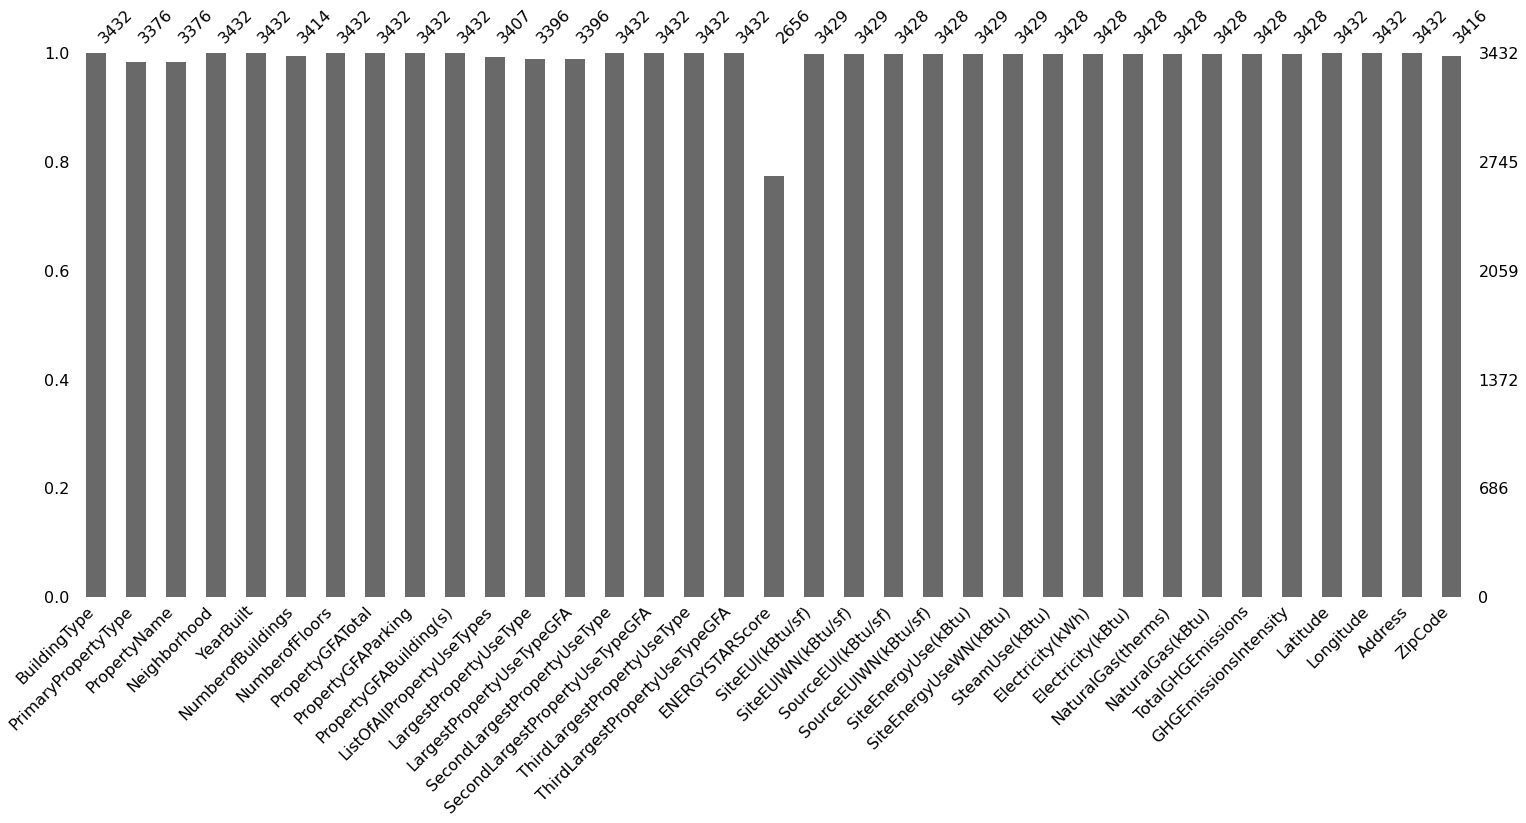

In [132]:
msno.bar(data)

In [133]:
data.shape

(3432, 35)

In [134]:
variables = ['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'BuildingType', 'PrimaryPropertyType', 'PropertyName', "Neighborhood"
      ,'ZipCode', 'Latitude', 'Longitude',"Address",
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore']

In [135]:
len(variables)

35

In [136]:
data["GHGEmissionsIntensity"]

OSEBuildingID
1         2.735
2         2.620
3         2.055
5        18.025
8         3.450
          ...  
50222     1.700
50223     2.010
50224    16.990
50225     1.570
50226     2.260
Name: GHGEmissionsIntensity, Length: 3432, dtype: float64

## Variables caractéristiques du batiment (surface, type d'exploitation etc  ) en vue de faire des prédictions de consommation d'énergeie et d'émission de CO2

In [137]:
variables_pertinentes = ['Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA','PrimaryPropertyType','LargestPropertyUseType', 'SecondLargestPropertyUseType','ThirdLargestPropertyUseType', "SiteEnergyUse(kBtu)", "TotalGHGEmissions"]

<AxesSubplot:>

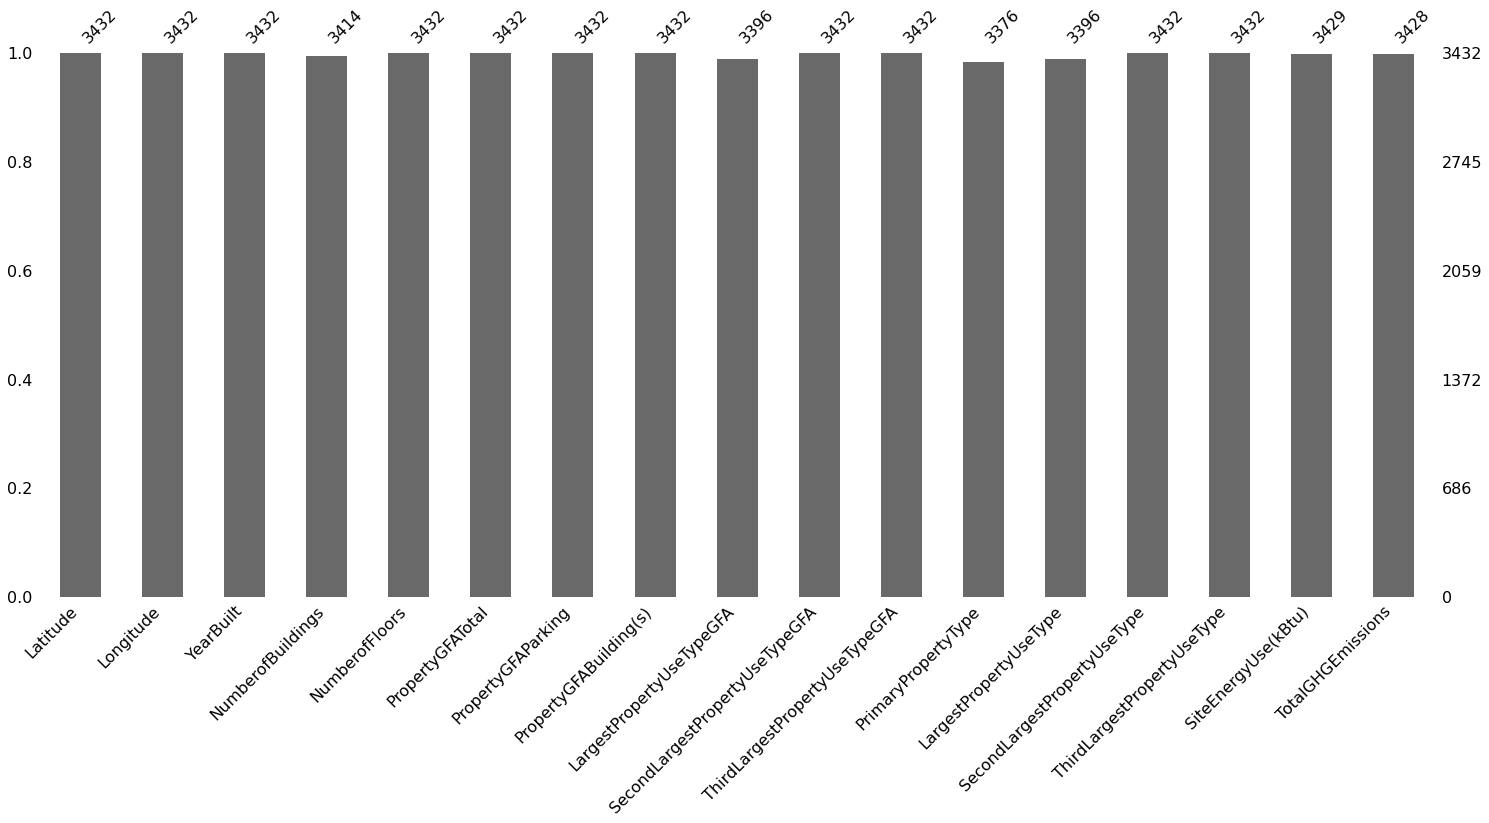

In [138]:
msno.bar(data.loc[:,variables_pertinentes])

In [139]:
databis=data.loc[:,variables_pertinentes].dropna() 
databis

,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,PrimaryPropertyType,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,SiteEnergyUse(kBtu),TotalGHGEmissions
OSEBuildingID,,,,,,,,,,,,,,,,,
1,47.61220,-122.33799,1927.0,1.0,12.0,88434.0,0.0,88434.0,88434.0,0.0,0.0,Hotel,Hotel,Nothing,Nothing,7.103895e+06,249.705
2,47.61317,-122.33393,1996.0,1.0,11.0,103566.0,15064.0,88502.0,83880.0,15064.0,4622.0,Hotel,Hotel,Parking,Restaurant,8.371084e+06,279.685
3,47.61393,-122.33810,1969.0,1.0,41.0,956110.0,196718.0,759392.0,756493.0,0.0,0.0,Hotel,Hotel,Nothing,Nothing,7.285884e+07,2075.380
5,47.61412,-122.33664,1926.0,1.0,10.0,61320.0,0.0,61320.0,61320.0,0.0,0.0,Hotel,Hotel,Nothing,Nothing,1.751195e+07,1111.385
8,47.61375,-122.34047,1980.0,1.0,18.0,175580.0,62000.0,113580.0,123445.0,68009.0,0.0,Hotel,Hotel,Parking,Swimming Pool,1.450085e+07,506.355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50222,47.56722,-122.31154,1990.0,1.0,1.0,12294.0,0.0,12294.0,12294.0,0.0,0.0,Office,Office,Nothing,Nothing,8.497457e+05,20.940
50223,47.59625,-122.32283,2004.0,1.0,1.0,16000.0,0.0,16000.0,16000.0,0.0,0.0,Other,Other - Recreation,Nothing,Nothing,9.502762e+05,32.170
50224,47.63644,-122.35784,1974.0,1.0,1.0,13157.0,0.0,13157.0,7583.0,5574.0,0.0,Other,Other - Recreation,Fitness Center/Health Club/Gym,Swimming Pool,5.765898e+06,223.540


In [140]:
len(variables_pertinentes)

17

In [141]:
variables_numériques = ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', "SiteEnergyUse(kBtu)", "TotalGHGEmissions"]
# Variables qualitatives 
variables_qualitatives = ['PrimaryPropertyType', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']

In [142]:
variables_pertinentes[3:-6]

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA']

In [143]:
# Datataframe sur la taille des bâtiments( surfaces, nombres d'étages, de bâtiments)
data_taille_batiment = databis.loc[:,variables_pertinentes[3:-6]]
data_taille_batiment

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
OSEBuildingID,,,,,,,,
1,1.0,12.0,88434.0,0.0,88434.0,88434.0,0.0,0.0
2,1.0,11.0,103566.0,15064.0,88502.0,83880.0,15064.0,4622.0
3,1.0,41.0,956110.0,196718.0,759392.0,756493.0,0.0,0.0
5,1.0,10.0,61320.0,0.0,61320.0,61320.0,0.0,0.0
8,1.0,18.0,175580.0,62000.0,113580.0,123445.0,68009.0,0.0
...,...,...,...,...,...,...,...,...
50222,1.0,1.0,12294.0,0.0,12294.0,12294.0,0.0,0.0
50223,1.0,1.0,16000.0,0.0,16000.0,16000.0,0.0,0.0
50224,1.0,1.0,13157.0,0.0,13157.0,7583.0,5574.0,0.0


In [144]:
data_taille_batiment.isnull().sum()

NumberofBuildings                  0
NumberofFloors                     0
PropertyGFATotal                   0
PropertyGFAParking                 0
PropertyGFABuilding(s)             0
LargestPropertyUseTypeGFA          0
SecondLargestPropertyUseTypeGFA    0
ThirdLargestPropertyUseTypeGFA     0
dtype: int64

In [145]:
data_taille_batiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 1 to 50226
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   NumberofBuildings                3356 non-null   float64
 1   NumberofFloors                   3356 non-null   float64
 2   PropertyGFATotal                 3356 non-null   float64
 3   PropertyGFAParking               3356 non-null   float64
 4   PropertyGFABuilding(s)           3356 non-null   float64
 5   LargestPropertyUseTypeGFA        3356 non-null   float64
 6   SecondLargestPropertyUseTypeGFA  3356 non-null   float64
 7   ThirdLargestPropertyUseTypeGFA   3356 non-null   float64
dtypes: float64(8)
memory usage: 236.0 KB


## Détermination des variables à prédire y1 et y2 ( les targets)

### La consommation totale d'énergie par les bâtiments y1

In [146]:
y1 = databis["SiteEnergyUse(kBtu)"]
y1

OSEBuildingID
1        7.103895e+06
2        8.371084e+06
3        7.285884e+07
5        1.751195e+07
8        1.450085e+07
             ...     
50222    8.497457e+05
50223    9.502762e+05
50224    5.765898e+06
50225    7.194712e+05
50226    1.152896e+06
Name: SiteEnergyUse(kBtu), Length: 3356, dtype: float64

####   Du fait de la grande étendue des valeurs de consommations d'énergie et des émissions de CO2, nous allons travailler en échelle logarithmique qui espace les valeurs faibles et rapproche les très grandes valeurs.  Sur une petite échelle, on va donc pouvoir voir  une large gamme de valeurs à condition qu'elles soient non nulles et de même signes. On pourra aprés prédiction de ces variables revenir à leurs valeurs réelles en applicant la fonction inverse qui est l'exponentielle.

In [147]:
y1_log = np.log(1+databis["SiteEnergyUse(kBtu)"])
y1_log

OSEBuildingID
1        15.776154
2        15.940294
3        18.104034
5        16.678394
8        16.489718
           ...    
50222    13.652694
50223    13.764509
50224    15.567472
50225    13.486273
50226    13.957789
Name: SiteEnergyUse(kBtu), Length: 3356, dtype: float64

### Les émissions de CO2 des bâtiments y2

In [148]:
y2 = databis["TotalGHGEmissions"]
y2

OSEBuildingID
1         249.705
2         279.685
3        2075.380
5        1111.385
8         506.355
           ...   
50222      20.940
50223      32.170
50224     223.540
50225      22.110
50226      41.270
Name: TotalGHGEmissions, Length: 3356, dtype: float64

In [149]:
y2_log = np.log(1+databis["TotalGHGEmissions"])
y2_log

OSEBuildingID
1        5.524277
2        5.637233
3        7.638381
5        7.014262
8        6.229211
           ...   
50222    3.088311
50223    3.501646
50224    5.414054
50225    3.140265
50226    3.744078
Name: TotalGHGEmissions, Length: 3356, dtype: float64

<Figure size 2880x4320 with 0 Axes>

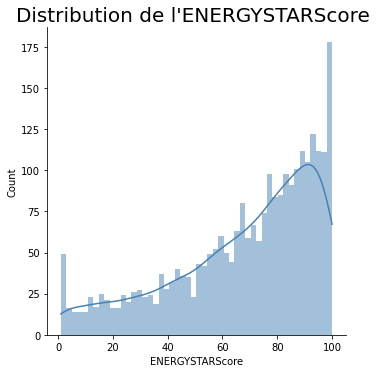

In [150]:
fig = plt.figure(figsize=(40, 60))
h = sns.displot(data["ENERGYSTARScore"],color='steelblue', bins=50, kde=True, edgecolor='none')
plt.title("Distribution de l'ENERGYSTARScore ", fontsize=20)
plt.rcParams.update({'font.size': 10})


## Encodage des variables qualitatives avec le transformeur de sklearn OneHotEncoder ( transformation de ces valeurs en valeurs numériques)

In [151]:
databis.loc[:,"PrimaryPropertyType"].unique()

array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Low-Rise Multifamily',
       'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'High-Rise Multifamily', 'Restaurant',
       'Office'], dtype=object)

In [152]:
variables_qualitatives

['PrimaryPropertyType',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType']

In [153]:
data_varqual = databis.loc[:,[ 'PrimaryPropertyType',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType']]
data_varqual

,PrimaryPropertyType,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
OSEBuildingID,,,,
1,Hotel,Hotel,Nothing,Nothing
2,Hotel,Hotel,Parking,Restaurant
3,Hotel,Hotel,Nothing,Nothing
5,Hotel,Hotel,Nothing,Nothing
8,Hotel,Hotel,Parking,Swimming Pool
...,...,...,...,...
50222,Office,Office,Nothing,Nothing
50223,Other,Other - Recreation,Nothing,Nothing
50224,Other,Other - Recreation,Fitness Center/Health Club/Gym,Swimming Pool


In [154]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
data_varqual_codées = encoder.fit_transform(data_varqual)

In [155]:
data_varqual_codées.shape

(3356, 176)

In [156]:
print(type(data_varqual_codées))

<class 'scipy.sparse.csr.csr_matrix'>


In [157]:
data_varqual_codées

<3356x176 sparse matrix of type '<class 'numpy.float64'>'
	with 13424 stored elements in Compressed Sparse Row format>

In [158]:
df_varqual_codées = pd.DataFrame.sparse.from_spmatrix(data_varqual_codées)

In [159]:
df_varqual_codées.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3356 entries, 0 to 3355
Columns: 176 entries, 0 to 175
dtypes: Sparse[float64, 0](176)
memory usage: 157.4 KB


In [160]:
# Attribution des identifiants des bâtiments commme index du dataframe df_varqual_codées:
df_varqual_codées.set_index(databis.index,inplace = True)

In [161]:
data_taille_batiment

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
OSEBuildingID,,,,,,,,
1,1.0,12.0,88434.0,0.0,88434.0,88434.0,0.0,0.0
2,1.0,11.0,103566.0,15064.0,88502.0,83880.0,15064.0,4622.0
3,1.0,41.0,956110.0,196718.0,759392.0,756493.0,0.0,0.0
5,1.0,10.0,61320.0,0.0,61320.0,61320.0,0.0,0.0
8,1.0,18.0,175580.0,62000.0,113580.0,123445.0,68009.0,0.0
...,...,...,...,...,...,...,...,...
50222,1.0,1.0,12294.0,0.0,12294.0,12294.0,0.0,0.0
50223,1.0,1.0,16000.0,0.0,16000.0,16000.0,0.0,0.0
50224,1.0,1.0,13157.0,0.0,13157.0,7583.0,5574.0,0.0


## Détermination des variables d'entrées X ( les features)

##### Concaténation des 2 dataframes; df_varqual_codées  et  data_taille_batiment

In [162]:
X = pd.concat([data_taille_batiment,df_varqual_codées],axis=1)
X

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,0,1,...,166,167,168,169,170,171,172,173,174,175
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,1.0,12.0,88434.0,0.0,88434.0,88434.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,11.0,103566.0,15064.0,88502.0,83880.0,15064.0,4622.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,41.0,956110.0,196718.0,759392.0,756493.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,10.0,61320.0,0.0,61320.0,61320.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,18.0,175580.0,62000.0,113580.0,123445.0,68009.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50222,1.0,1.0,12294.0,0.0,12294.0,12294.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50223,1.0,1.0,16000.0,0.0,16000.0,16000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50224,1.0,1.0,13157.0,0.0,13157.0,7583.0,5574.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [163]:
# Fonction pour séparer les données en un jeu d'entrainement et un jeu de test:

def split_data(features, target):

    from sklearn.model_selection import train_test_split

    # 20% des données dans le jeu de test
    X_1, X_2, y_1, y_2 = train_test_split(features, target, test_size=0.2)
   
    # Returning results
    return (X_1, X_2, y_1, y_2)



# Fonction pour standardiser les données:

def standardisation_data(a_train, a_test):
    
    from sklearn import preprocessing
    std_scale = preprocessing.StandardScaler().fit(a_train)
    
    a_train_std = std_scale.transform(a_train)
    a_test_std = std_scale.transform(a_test)
    
    return (a_train_std, a_test_std)

# I)  Prédiction par différents modéles de la consommation totale d'énergie 

##   1.  Séparation des données en un jeu de test et un jeu d'entrainement

Nous allons séparer nos données en un jeu d'entraînement (X_train, y1_train) et un jeu de test (X_test, y1_test).

In [171]:
X_train, X_test, y1_train, y1_test  = split_data (X, y1_log)

##  2. Standardisation des données

#### Nous pouvons maintenant standardiser les variables, c'est-à-dire les centrer (ramener leur moyenne à 0) et les réduire (ramener leur écart-type à 1), afin qu'elles se placent toutes à peu près sur la même échelle.

In [172]:
X_train_std, X_test_std = standardisation_data (X_train, X_test)

C:\Users\Brahim\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Brahim\anaconda3\lib\site-packages\sklearn\utils\validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Brahim\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Brahim\anaconda3\lib\site-packages\sklearn\utils\validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Brahim\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support na

##  3. Prédiction par plusieurs modéles

### 3.1 Les modèles simples

 ###   a. Le modéle linéaire (La régression Elastic-Net)

 ####   a.1)  Recherche des hyperparamètres optimaux par GridSearchCV

In [173]:
np.linspace(0, 1, 30)

array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ])

In [174]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# choisir 6 valeurs pour alpha
alpha_range = [0.1,1,10,0.01]

# choisir 4 valeurs pour l1_ratio, entre 1e-2 et 10
l1_ratio_range = np.arange(0.40,1.00,0.10)


# grille de paramètres
param_grid = {'alpha': alpha_range , 'l1_ratio':l1_ratio_range}


# critère de sélection du meilleur modèle
#score = 'r2'

# initialiser une recherche sur grille
# 5 folds de validation croisée
grid = GridSearchCV(ElasticNet(),  param_grid,  cv=5, scoring='r2')

# faire tourner la recherche sur grille
grid.fit(X_train_std, y1_train)

# afficher les paramètres optimaux
print("Les meilleurs paramètres sont {} avec un score de  {:.2f}".format(grid.best_params_, grid.best_score_))

Les meilleurs paramètres sont {'alpha': 0.1, 'l1_ratio': 0.4} avec un score de  0.34


 ####   a.2)  Entrainement du modèle avec les hyperparamètres optimaux

In [175]:
def modele_Elasticnet_regression (a_train, a_test, b_train, b_test):
    from sklearn.linear_model import ElasticNet
    from sklearn.metrics import mean_squared_error
    import math
    from timeit import default_timer as timer
    
    start = timer()
    
    # On crée un modèle de régression linéaire
    model = ElasticNet(alpha=0.1, l1_ratio=0.4)
    # On entraîne ce modèle sur les données d'entrainement
    model.fit(a_train, b_train)
    
    end = timer()
    
    b_pred = model.predict(a_test)
    MSE = mean_squared_error(b_test, b_pred) #Erreur quadratique myenne
    RMSE = math.sqrt(MSE) #La racine carré dealpha=1.0, l1_ratio=0.5 l'erreur quadratique moyenne
    
    Dictionnaire = {"Performance du modèle sur la base des données d'apprentissage" : model.score(a_train, b_train), 
    "Performance du modèle sur la base des données de test" : model.score(a_test, b_test),
    "RMSE" : RMSE, "Temps d'exécution en s" : end - start}
    
    return Dictionnaire
    
    
    
    
def predictions_Elasticnet_regression (a_train, a_test, b_train, b_test):
    from sklearn.linear_model import ElasticNet
    model = ElasticNet(alpha=0.1, l1_ratio=0.4)
    model.fit(a_train, b_train)
    return model.predict(a_test)
    
        
    

In [176]:
modele_Elasticnet_regression (X_train_std, X_test_std, y1_train, y1_test)

{"Performance du modèle sur la base des données d'apprentissage": 0.5270279029554458,
 'Performance du modèle sur la base des données de test': 0.5121833126941148,
 'RMSE': 0.8051952724627028,
 "Temps d'exécution en s": 0.013355999999930646}

In [177]:
Score_R2_Elasticnet_regression = modele_Elasticnet_regression (X_train_std, X_test_std, y1_train, y1_test)['Performance du modèle sur la base des données de test']
RMSE_Elasticnet_regression = modele_Elasticnet_regression (X_train_std, X_test_std, y1_train, y1_test)['RMSE']
Temps_exécution_Elasticnet_regression = modele_Elasticnet_regression (X_train_std, X_test_std, y1_train, y1_test)["Temps d'exécution en s"]

#### a.3)  Valeur de prédiction de y1 pour ce modèle linéaire, notée y1_pred_ML

In [178]:
y1_pred_ML = predictions_Elasticnet_regression(X_train_std, X_test_std, y1_train, y1_test)
y1_pred_ML

array([13.97831412, 14.46737491, 15.11855133, 14.64721931, 13.92324202,
       14.99699773, 13.89165115, 15.03820129, 15.56071594, 14.08455832,
       13.87952529, 14.46621595, 14.30581563, 14.41942566, 15.77609768,
       14.06053831, 14.39366164, 14.15309633, 14.53059294, 14.67399255,
       13.94041351, 14.39769412, 14.81315731, 16.27811708, 14.07644895,
       14.30367927, 14.13955147, 15.87610853, 14.12293389, 14.49987285,
       14.65122612, 14.54248718, 13.88150346, 13.75649426, 14.63938092,
       14.8280762 , 13.85794961, 17.50337235, 13.92069585, 14.38903934,
       14.26226609, 13.92538417, 13.95950624, 14.75747274, 15.85005868,
       14.57279233, 15.16154972, 14.56882545, 14.0625664 , 14.55236648,
       14.65000807, 14.71392008, 14.10936404, 13.94817716, 17.00493013,
       13.936647  , 15.74077526, 14.71888276, 14.68962882, 13.9420172 ,
       14.43049136, 13.94574786, 15.50608309, 13.94842657, 14.7781743 ,
       15.08879418, 13.95168658, 13.90754064, 16.24934896, 14.55

 ###   b. Le modéle non linéaire: le modèle SVR

 ####   b.1)  Recherche des hyperparamètres optimaux par GridSearchCV

#### Cas du noyau gaussien

In [179]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# choisir 6 valeurs pour C, entre 1e-2 et 1e3
C_range = np.logspace(-2, 3, 6)

# choisir 4 valeurs pour gamma, entre 1e-2 et 10
gamma_range = np.logspace(-4, 1, 6)

# choisir 6 valeurs pour epsilon , entre 1e-4 et 10
epsilon_range = np.logspace(-4, 1, 6)

# grille de paramètres
param_grid = {'C' : C_range, 'gamma': gamma_range,"epsilon": epsilon_range }


# critère de sélection du meilleur modèle
#score = 'r2'

# initialiser une recherche sur grille
# 5 folds de validation croisée
grid = GridSearchCV(SVR(kernel='rbf'),  param_grid,  cv=5, scoring='r2')

# faire tourner la recherche sur grille
grid.fit(X_train_std, y1_train)

# afficher les paramètres optimaux
print("Les meilleurs paramètres sont {} avec un score de  {:.2f}".format(grid.best_params_, grid.best_score_))

Les meilleurs paramètres sont {'C': 10.0, 'epsilon': 0.1, 'gamma': 0.001} avec un score de  0.61


 ####   a.2)  Entrainement du modèle avec les hyperparamètres optimaux

In [180]:
def modele_svr (a_train, a_test, b_train, b_test):
    from sklearn.svm import SVR
    from sklearn.metrics import mean_squared_error
    import math
    from timeit import default_timer as timer
    
    start = timer()
    
    # Créer une SVR avec un noyau gaussien de paramètre gamma=0.01
    model = SVR(kernel="rbf", C=10, gamma=0.001, epsilon=0.1)
    # On entraîne ce modèle sur les données d'entrainement
    model.fit(a_train, b_train)
    
    end = timer()
    
    b_pred = model.predict(a_test)
    MSE = mean_squared_error(b_test, b_pred) #Erreur quadratique myenne
    RMSE = math.sqrt(MSE) #La racine carré de l'erreur quadratique moyenne 

    Dictionnaire = {"Performance du modèle sur la base des données d'apprentissage" : model.score(a_train, b_train), 
    "Performance du modèle sur la base des données de test" : model.score(a_test, b_test),
    "RMSE" : RMSE, "Temps d'exécution en s" : end - start }
    
    return Dictionnaire


def predictions_svr (a_train, a_test, b_train, b_test):
    from sklearn.svm import SVR
    model = SVR(kernel="rbf", C=10, gamma=0.001, epsilon=0.1)
    model.fit(a_train, b_train)
    return model.predict(a_test)
    
    

In [181]:
modele_svr (X_train_std, X_test_std, y1_train, y1_test)

{"Performance du modèle sur la base des données d'apprentissage": 0.716826996054144,
 'Performance du modèle sur la base des données de test': 0.7015159965000787,
 'RMSE': 0.6298446150099439,
 "Temps d'exécution en s": 0.4173041999999896}

In [182]:
Score_R2_svr = modele_svr (X_train_std, X_test_std, y1_train, y1_test)['Performance du modèle sur la base des données de test']
RMSE_svr = modele_svr (X_train_std, X_test_std, y1_train, y1_test)['RMSE']
Temps_exécution_svr = modele_svr (X_train_std, X_test_std, y1_train, y1_test)["Temps d'exécution en s"]

#### a.3)  Valeur de prédiction de y1 pour le modèle SVR, notée y1_pred_svr

In [183]:
y1_pred_svr = predictions_svr(X_train, X_test, y1_train, y1_test)
y1_pred_svr

C:\Users\Brahim\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Brahim\anaconda3\lib\site-packages\sklearn\utils\validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Brahim\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Brahim\anaconda3\lib\site-packages\sklearn\utils\validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


array([14.68157582, 13.81528699, 14.68157582, 14.68157582, 14.68157582,
       14.68157582, 14.68157582, 14.68157582, 14.68157582, 14.68157582,
       14.40735001, 14.68157582, 14.68157582, 14.68157582, 14.68157582,
       14.68157582, 14.68134882, 14.68157582, 14.68157582, 14.68157582,
       14.68157582, 14.68157582, 14.68157582, 14.68157582, 13.47048916,
       14.68157582, 14.68157582, 14.68157582, 14.68157582, 13.81678474,
       14.68157582, 14.08345212, 14.62032129, 14.68157564, 14.68157582,
       14.68157582, 14.28220347, 14.68157582, 14.68157582, 13.8328179 ,
       14.68157582, 14.68157582, 14.68157582, 14.68157582, 14.68157582,
       14.68157582, 14.68157582, 14.68157607, 14.68157582, 14.68157582,
       13.29224422, 14.68157582, 14.68157582, 14.0467068 , 14.68157582,
       12.5712144 , 14.68157582, 14.68157582, 14.68157582, 14.68157582,
       14.68157582, 14.68157582, 14.68157582, 14.68157582, 14.68157582,
       14.68157582, 14.68157582, 13.89053091, 14.68157582, 14.68

### 3.2 Les modèles ensemblistes utilisant les méthodes paralléles

 ###   a. Le modéle du Bagging

 ####   a.1)  Recherche des hyperparamètres optimaux par GridSearchCV

In [185]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV

param_grid = { 'n_estimators': [10, 50, 100,300, 500, 1000]}



# initialiser une recherche sur grille
# 5 folds de validation croisée
grid = GridSearchCV(BaggingRegressor(),  param_grid,  cv=5, scoring='r2')

# faire tourner la recherche sur grille
grid.fit(X_train_std, y1_train)

# afficher les paramètres optimaux
print("Les meilleurs paramètres sont {} avec un score de  {:.2f}".format(grid.best_params_, grid.best_score_))

Les meilleurs paramètres sont {'n_estimators': 1000} avec un score de  0.71


 ####   a.2)  Entrainement du modèle avec les hyperparamètres optimaux

In [186]:
def modele_bagging (a_train, a_test, b_train, b_test):
    from sklearn.ensemble import BaggingRegressor
    from sklearn.metrics import mean_squared_error
    import math
    from timeit import default_timer as timer
    
    start = timer()
    
    model = BaggingRegressor ( n_estimators=1000 )
    # On entraîne ce modèle sur les données d'entrainement
    model.fit(a_train, b_train)
    
    end = timer()
    
    b_pred = model.predict(a_test)
    MSE = mean_squared_error(b_test, b_pred) #Erreur quadratique myenne
    RMSE = math.sqrt(MSE) #La racine carré de l'erreur quadratique moyenne 
    
    Dictionnaire = {"Performance du modèle sur la base des données d'apprentissage" : model.score(a_train, b_train), 
    "Performance du modèle sur la base des données de test" : model.score(a_test, b_test),
    "RMSE" : RMSE, "Temps d'exécution en s" : end - start }
    
    return Dictionnaire

    
    
    
def predictions_bagging (a_train, a_test, b_train, b_test):
    from sklearn.ensemble import BaggingRegressor
    model = BaggingRegressor ( n_estimators=1000 )
    model.fit(a_train, b_train)
    return model.predict(a_test)

In [187]:
modele_bagging (X_train_std, X_test_std, y1_train, y1_test)

{"Performance du modèle sur la base des données d'apprentissage": 0.9583422478348567,
 'Performance du modèle sur la base des données de test': 0.7511625826538098,
 'RMSE': 0.5750832688144724,
 "Temps d'exécution en s": 16.34693799999991}

In [188]:
Score_R2_Bagging = modele_bagging (X_train_std, X_test_std, y1_train, y1_test)['Performance du modèle sur la base des données de test']
RMSE_Bagging = modele_bagging (X_train_std, X_test_std, y1_train, y1_test)['RMSE']
Temps_exécution_Bagging = modele_bagging (X_train_std, X_test_std, y1_train, y1_test)["Temps d'exécution en s"]

In [189]:
(Score_R2_Bagging, RMSE_Bagging, Temps_exécution_Bagging)

(0.7507555003437644, 0.5756253136156669, 16.916040199999998)

 ###   b. Le modéle Random forest

 ####   b.1) Recherche des hyperparamètres optimaux par GridSearchCV

In [190]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(random_state=42)
param_grid = { 'n_estimators': [100, 200, 500, 1000],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth' : [4,5,6,7,8, 10, 12, 15, 20],
                'criterion' :['squared_error', 'friedman_mse']}

# initialiser une recherche sur grille
# 5 folds de validation croisée
grid = GridSearchCV(RandomForestRegressor(),  param_grid,  cv=5, scoring='r2')

# faire tourner la recherche sur grille
grid.fit(X_train_std, y1_train)

# afficher les paramètres optimaux
print("Les meilleurs paramètres sont {} avec un score de  {:.2f}".format(grid.best_params_, grid.best_score_))

Les meilleurs paramètres sont {'n_estimators': 500} avec un score de  0.71


 ####   b.2)  Entrainement du modèle avec les hyperparamètres optimaux

In [191]:
def modele_Random_forest (a_train, a_test, b_train, b_test):
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error
    import math
    from timeit import default_timer as timer
    
    start = timer()
    
    model = RandomForestRegressor ( n_estimators=500, criterion = 'friedman_mse', max_depth= 20, max_features= 'sqrt')
    # On entraîne ce modèle sur les données d'entrainement
    model.fit(a_train, b_train)
    
    end = timer()
    
    b_pred = model.predict(a_test)
    MSE = mean_squared_error(b_test, b_pred) #Erreur quadratique myenne
    RMSE = math.sqrt(MSE) #La racine carré de l'erreur quadratique moyenne
  
    Dictionnaire = {"Performance du modèle sur la base des données d'apprentissage" : model.score(a_train, b_train), 
    "Performance du modèle sur la base des données de test" : model.score(a_test, b_test),
    "RMSE" : RMSE, "Temps d'exécution en s" : end - start }
    
    return Dictionnaire


def predictions_Random_forest (a_train, a_test, b_train, b_test):
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor ( n_estimators=500)
    model.fit(a_train, b_train)
    return model.predict(a_test)
    

In [192]:
modele_Random_forest (X_train_std, X_test_std, y1_train, y1_test)

{"Performance du modèle sur la base des données d'apprentissage": 0.9021887798912165,
 'Performance du modèle sur la base des données de test': 0.7727421124933402,
 'RMSE': 0.5495818386590339,
 "Temps d'exécution en s": 1.343373500000098}

In [193]:
Score_R2_Random_forest = modele_Random_forest (X_train_std, X_test_std, y1_train, y1_test)['Performance du modèle sur la base des données de test']
RMSE_Random_forest = modele_Random_forest (X_train_std, X_test_std, y1_train, y1_test)['RMSE']
Temps_exécution_Random_forest = modele_Random_forest (X_train_std, X_test_std, y1_train, y1_test)["Temps d'exécution en s"]

 ###  c. Le modéle de l'arbre de décision

 ####   c.1)  Recherche des hyperparamètres optimaux par GridSearchCV

In [196]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {  'max_depth' :  [2,4,6,8,10,12]}

# initialiser une recherche sur grille
# 5 folds de validation croisée
grid = GridSearchCV(DecisionTreeRegressor(),  param_grid,  cv=5, scoring='r2')

# faire tourner la recherche sur grille
grid.fit(X_train_std, y1_train)

# afficher les paramètres optimaux
print("Les meilleurs paramètres sont {} avec un score de  {:.2f}".format(grid.best_params_, grid.best_score_))

Les meilleurs paramètres sont {'max_depth': 8} avec un score de  0.65


 ####   c.2)  Entrainement du modèle avec les hyperparamètres optimaux

In [197]:
def modele_arbre_de_décision (a_train, a_test, b_train, b_test):
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import mean_squared_error
    import math
    from timeit import default_timer as timer
    
    start = timer()
    
    model = DecisionTreeRegressor(max_depth = 8)
    # On entraîne ce modèle sur les données d'entrainement
    model.fit(a_train, b_train)
    
    end = timer()
    
    b_pred = model.predict(a_test)
    MSE = mean_squared_error(b_test, b_pred) #Erreur quadratique myenne
    RMSE = math.sqrt(MSE) #La racine carré de l'erreur quadratique moyenne
 
    Dictionnaire = {"Performance du modèle sur la base des données d'apprentissage" : model.score(a_train, b_train), 
    "Performance du modèle sur la base des données de test" : model.score(a_test, b_test),
    "RMSE" : RMSE, "Temps d'exécution en s" : end - start }
    
    return Dictionnaire

    

def predictions_arbre_de_décision (a_train, a_test, b_train, b_test):
    from sklearn.tree import DecisionTreeRegressor
    model = DecisionTreeRegressor(max_depth = 8)
    model.fit(a_train, b_train)
    return model.predict(a_test)

In [198]:
modele_arbre_de_décision (X_train_std, X_test_std, y1_train, y1_test)

{"Performance du modèle sur la base des données d'apprentissage": 0.8056096415119336,
 'Performance du modèle sur la base des données de test': 0.7001549568614112,
 'RMSE': 0.6312789774469962,
 "Temps d'exécution en s": 0.01332849999971586}

In [199]:
Score_R2_arbre_de_décision = modele_arbre_de_décision (X_train_std, X_test_std, y1_train, y1_test)['Performance du modèle sur la base des données de test']
RMSE_arbre_de_décision = modele_arbre_de_décision (X_train_std, X_test_std, y1_train, y1_test)['RMSE']
Temps_exécution_arbre_de_décision = modele_arbre_de_décision (X_train_std, X_test_std, y1_train, y1_test)["Temps d'exécution en s"]

### 3.3 Les modèles ensemblistes utilisant les méthodes séquentielles et le boosting

### a. L'algorithme AdaBoost

 ####   a.1)  Recherche des hyperparamètres optimaux par GridSearchCV

In [200]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

param_grid = { 'n_estimators': [10, 50,  100, 300, 500, 1000]}

# initialiser une recherche sur grille
# 5 folds de validation croisée
grid = GridSearchCV(AdaBoostRegressor(),  param_grid,  cv=5, scoring='r2')

# faire tourner la recherche sur grille
grid.fit(X_train_std, y1_train)

# afficher les paramètres optimaux
print("Les meilleurs paramètres sont {} avec un score de  {:.2f}".format(grid.best_params_, grid.best_score_))

Les meilleurs paramètres sont {'n_estimators': 100} avec un score de  0.60


 ####   a.2)  Entrainement du modèle avec les hyperparamètres optimaux

In [201]:
def modele_AdaBoost (a_train, a_test, b_train, b_test):
    from sklearn.ensemble import AdaBoostRegressor
    from sklearn.metrics import mean_squared_error
    import math
    from timeit import default_timer as timer
    
    start = timer()
    
    model = AdaBoostRegressor(n_estimators=100)
    # On entraîne ce modèle sur les données d'entrainement
    model.fit(a_train, b_train)
    
    end = timer()
    
    b_pred = model.predict(a_test)
    MSE = mean_squared_error(b_test, b_pred) #Erreur quadratique myenne
    RMSE = math.sqrt(MSE) #La racine carré de l'erreur quadratique moyenne
    
    Dictionnaire = {"Performance du modèle sur la base des données d'apprentissage" : model.score(a_train, b_train), 
    "Performance du modèle sur la base des données de test" : model.score(a_test, b_test),
    "RMSE" : RMSE, "Temps d'exécution en s" : end - start }
    
    return Dictionnaire


def predictions_modele_AdaBoost (a_train, a_test, b_train, b_test):
    from sklearn.tree import AdaBoostRegressor
    model = AdaBoostRegressor(n_estimators=100)
    model.fit(a_train, b_train)
    return model.predict(a_test)
  

In [202]:
modele_AdaBoost (X_train_std, X_test_std, y1_train, y1_test)

{"Performance du modèle sur la base des données d'apprentissage": 0.6601104062631212,
 'Performance du modèle sur la base des données de test': 0.5914943214160167,
 'RMSE': 0.736837870963526,
 "Temps d'exécution en s": 0.7167273000000023}

In [203]:
Score_R2_AdaBoost = modele_AdaBoost (X_train_std, X_test_std, y1_train, y1_test)['Performance du modèle sur la base des données de test']
RMSE_AdaBoost = modele_AdaBoost (X_train_std, X_test_std, y1_train, y1_test)['RMSE']
Temps_exécution_AdaBoost = modele_AdaBoost (X_train_std, X_test_std, y1_train, y1_test)["Temps d'exécution en s"]

## 4. Comparaison des modèles

In [204]:
liste1 = [Score_R2_Elasticnet_regression, Score_R2_svr, Score_R2_Bagging, Score_R2_Random_forest, Score_R2_arbre_de_décision, Score_R2_AdaBoost,
        RMSE_Elasticnet_regression, RMSE_svr, RMSE_Bagging, RMSE_Random_forest, RMSE_arbre_de_décision, RMSE_AdaBoost,  
        Temps_exécution_Elasticnet_regression, Temps_exécution_svr, Temps_exécution_Bagging, Temps_exécution_Random_forest, Temps_exécution_arbre_de_décision, Temps_exécution_AdaBoost]

liste_score = ["Score_R2_Elasticnet_regression", "Score_R2_svr", "Score_R2_Bagging", "Score_R2_Random_forest", "Score_R2_arbre_de_décision", "Score_R2_AdaBoost"]

liste_RMSE = ["RMSE_Elasticnet_regression", "RMSE_svr", "RMSE_Bagging", "RMSE_Random_forest", "RMSE_arbre_de_décision", "RMSE_AdaBoost"]

liste_temps = ["Temps_exécution_Elasticnet_regression", "Temps_exécution_svr", "Temps_exécution_Bagging", "Temps_exécution_Random_forest", "Temps_exécution_arbre_de_décision", "Temps_exécution_AdaBoost"]


df1 = {}
for i in range(6):
    df1[liste_score[i]]= liste1[i]
    df1[liste_RMSE[i]] = liste1[i+6]
    df1[liste_temps[i]] = liste1[i+12]

In [205]:
data_metrics1 = pd.DataFrame([df1])
data_metrics1

,Score_R2_Elasticnet_regression,RMSE_Elasticnet_regression,Temps_exécution_Elasticnet_regression,Score_R2_svr,RMSE_svr,Temps_exécution_svr,Score_R2_Bagging,RMSE_Bagging,Temps_exécution_Bagging,Score_R2_Random_forest,RMSE_Random_forest,Temps_exécution_Random_forest,Score_R2_arbre_de_décision,RMSE_arbre_de_décision,Temps_exécution_arbre_de_décision,Score_R2_AdaBoost,RMSE_AdaBoost,Temps_exécution_AdaBoost
0,0.512183,0.805195,0.011942,0.701516,0.629845,0.38917,0.750756,0.575625,16.91604,0.774011,0.54517,1.299259,0.702391,0.633077,0.012805,0.589472,0.724871,0.299578


AxesSubplot(0.125,0.125;0.775x0.755)


<Figure size 216000x18144 with 0 Axes>

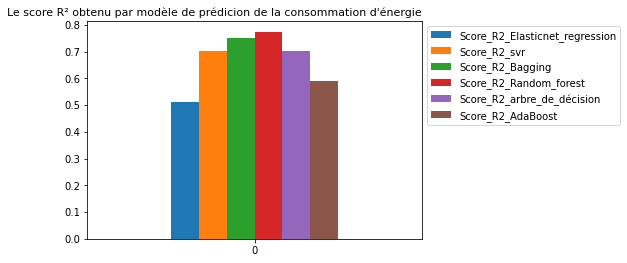

In [206]:
fig = plt.figure(figsize=(3000, 252))
axis = data_metrics1.loc[:,liste_score].plot.bar(rot=0)
plt.title("Le score R² obtenu par modèle de prédicion de la consommation d'énergie", size= 11, loc='right')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
print(axis)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


<Figure size 216000x18144 with 0 Axes>

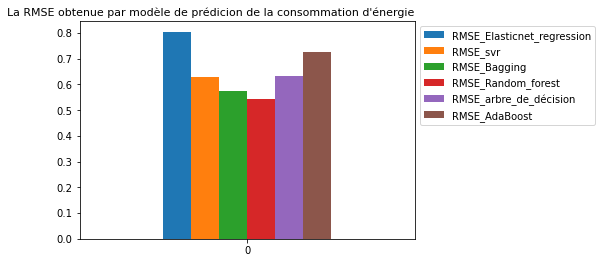

In [207]:
fig = plt.figure(figsize=(3000, 252))
axis = data_metrics1.loc[:,liste_RMSE].plot.bar(rot=0)
plt.title("La RMSE obtenue par modèle de prédicion de la consommation d'énergie", size= 11, loc='right')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
print(axis)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


<Figure size 216000x18144 with 0 Axes>

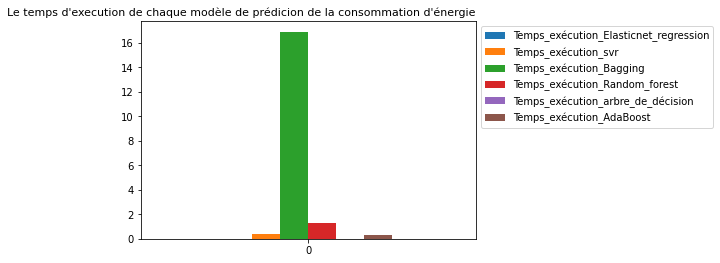

In [208]:
fig = plt.figure(figsize=(3000, 252))
axis = data_metrics1.loc[:,liste_temps].plot.bar(rot=0)
plt.title("Le temps d'execution de chaque modèle de prédicion de la consommation d'énergie", size= 11, loc='right')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
print(axis)
plt.show()

In [209]:
y1_pred_RandomForest_log = predictions_Random_forest(X_train_std, X_test_std, y1_train, y1_test)
y1_pred_RandomForest_log

array([13.76609208, 13.54891723, 15.9635975 , 14.40401527, 13.8986361 ,
       15.27358723, 13.60052342, 15.55482467, 15.84519001, 14.36226851,
       14.14006745, 13.83231909, 14.28452615, 14.48058112, 15.51132248,
       13.30707512, 13.92631691, 14.42847013, 14.69523484, 15.71449286,
       13.4156183 , 14.41695604, 15.0196436 , 16.37668921, 13.08239852,
       14.59243074, 14.49995059, 15.34211366, 14.46218478, 14.13275158,
       14.51164901, 13.73384843, 13.4296497 , 13.8703149 , 14.31809875,
       14.90904701, 13.96641314, 17.32413897, 13.62892579, 13.6296131 ,
       14.65411693, 13.28046881, 13.68659506, 14.85973987, 16.08400295,
       13.62745666, 16.38879342, 14.20274611, 13.53095664, 14.56546093,
       13.15242384, 15.98346587, 13.92828783, 13.62153101, 16.8341752 ,
       14.0471646 , 16.57780981, 14.6061897 , 14.86120588, 13.48790016,
       13.77501618, 13.49063051, 15.74917087, 13.55320138, 13.63103638,
       15.14274384, 13.98307088, 13.63311915, 17.07457314, 13.47

### Comparaison entre les valeurs réelles et celle de prédictions

Text(0, 0.5, 'y_prédiction_log')

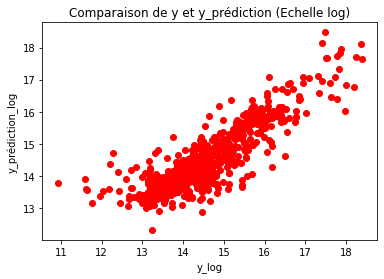

In [210]:
plt.scatter(y1_test, y1_pred_RandomForest_log, c = 'red')
plt.title("Comparaison de y et y_prédiction (Echelle log)",size= 12)
plt.xlabel("y_log", size = 10)
plt.ylabel("y_prédiction_log", size = 10)

## Passage en valeurs réelles en sortant de l'échelle logarithmique

In [211]:
y1_pred_RandomForest= np.exp(y1_pred_RandomForest_log)
y1= np.exp(y1_test)

Text(0, 0.5, 'y_prédiction')

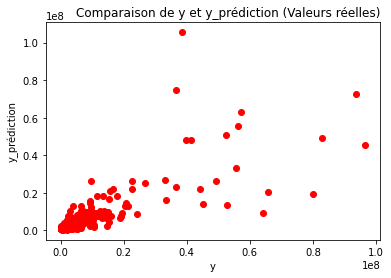

In [212]:
plt.scatter(y1, y1_pred_RandomForest,  c = 'red')
plt.title("Comparaison de y et y_prédiction (Valeurs réelles)",size= 12, loc='right')
plt.xlabel("y", size = 10)
plt.ylabel("y_prédiction", size = 10)


In [213]:
y1

OSEBuildingID
21871    1.071912e+06
23521    7.718923e+05
313      2.427409e+07
20484    2.581079e+06
20586    1.648256e+06
             ...     
28008    2.760454e+06
819      5.832441e+06
26829    1.371554e+06
27252    3.040054e+06
24132    1.318001e+06
Name: SiteEnergyUse(kBtu), Length: 672, dtype: float64

Text(0, 0.5, 'y_prédiction')

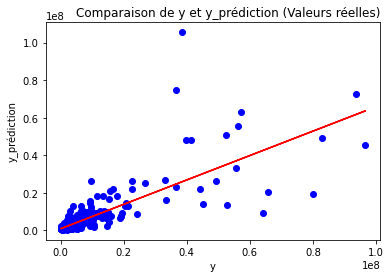

In [214]:
m, b = np.polyfit(y1.values, y1_pred_RandomForest, 1)
plt.plot(y1, y1_pred_RandomForest, 'bo',  y1, m*y1.values + b, 'r')
plt.title("Comparaison de y et y_prédiction (Valeurs réelles)",size= 12, loc='right')
plt.xlabel("y", size = 10)
plt.ylabel("y_prédiction", size = 10)


## Etude de l'importance des variables dans notre modèle

In [215]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_std, y1_train)

RandomForestRegressor()

In [216]:
X.columns.tolist()

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 14

In [217]:
liste_sans_EnergyStarScore = X.columns.tolist()[:8]
for elt in X.columns.tolist()[8:]:
    liste_sans_EnergyStarScore.append(f'{elt}') 

liste_sans_EnergyStarScore

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 

<BarContainer object of 184 artists>

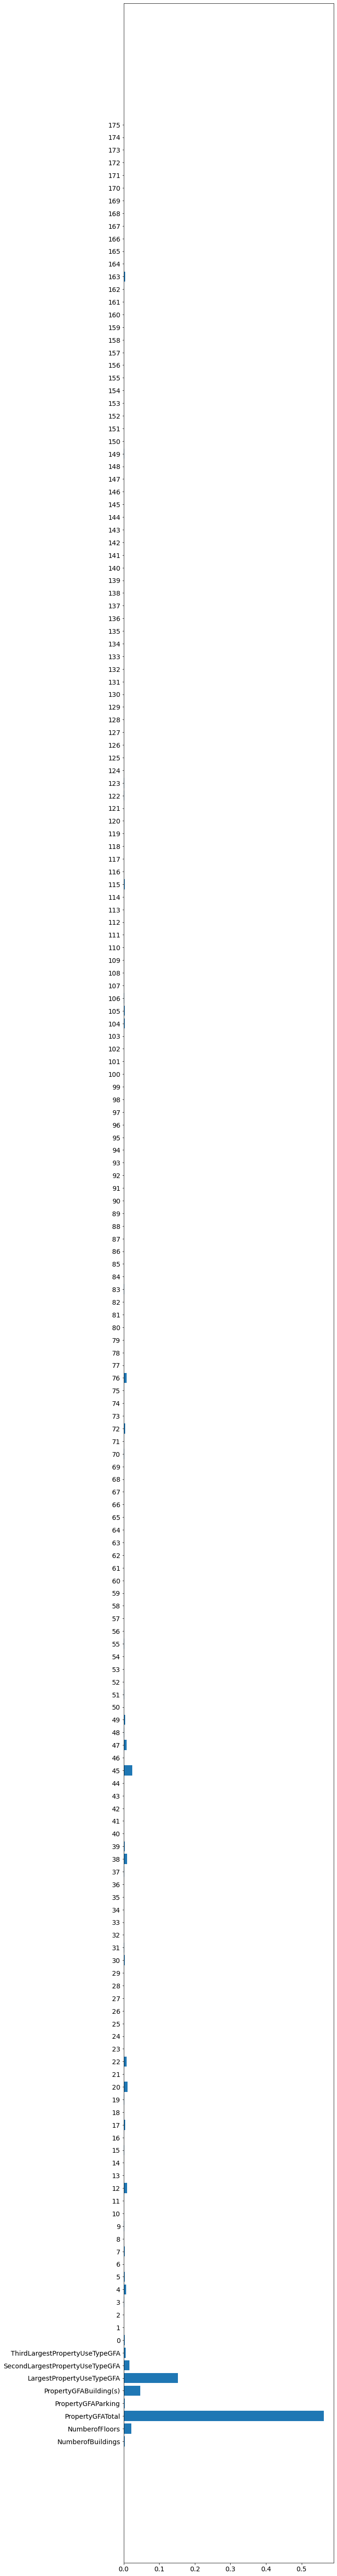

In [218]:
plt.rcParams.update({'figure.figsize': (8, 100)})
plt.rcParams.update({'font.size': 14})
plt.barh(liste_sans_EnergyStarScore, rf.feature_importances_.tolist())

In [219]:
rf.feature_importances_

array([3.67312881e-03, 2.19285744e-02, 5.62144173e-01, 3.51076573e-03,
       4.64005876e-02, 1.53018278e-01, 1.69666591e-02, 6.45285109e-03,
       2.79927835e-03, 3.94275684e-04, 7.14688025e-04, 1.27090583e-03,
       7.17969543e-03, 3.77086341e-03, 4.14290672e-04, 3.34539757e-03,
       2.66477886e-04, 1.67567652e-03, 8.28319554e-04, 2.72640060e-05,
       9.35387881e-03, 2.93320266e-04, 1.33676052e-04, 1.66593772e-03,
       1.09427143e-03, 4.86021118e-03, 7.93478468e-04, 1.76962054e-03,
       1.14277022e-02, 8.25532287e-04, 7.85590141e-03, 9.33630784e-04,
       3.00335317e-05, 6.24892750e-04, 1.24097043e-05, 7.30299513e-04,
       0.00000000e+00, 3.52291282e-06, 3.63951275e-03, 2.24556694e-03,
       8.85105689e-06, 3.26458824e-06, 1.29329385e-04, 2.18131369e-04,
       6.24960775e-04, 1.23658434e-03, 9.63926268e-03, 3.36012500e-03,
       5.48974387e-06, 1.61882134e-05, 5.91936312e-04, 2.42854608e-04,
       4.47808027e-05, 2.49980463e-02, 5.66723184e-04, 8.05812514e-03,
      

Text(0.5, 0, 'Random Forest Feature Importance')

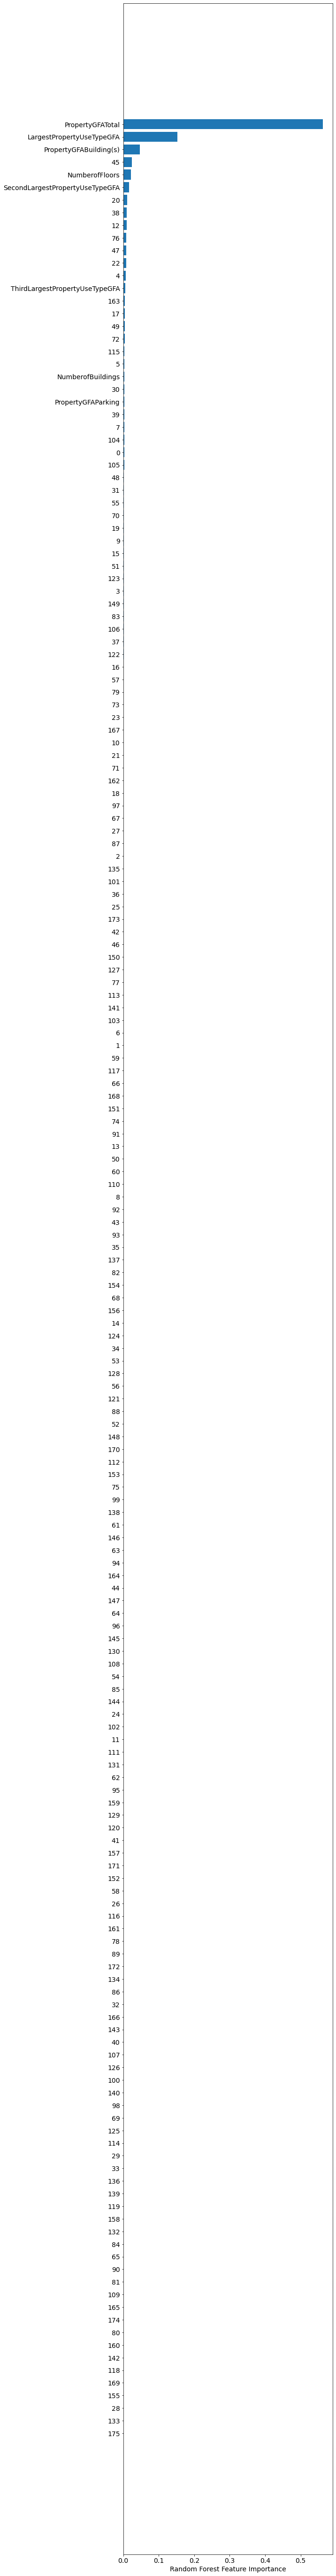

In [220]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(np.array(liste_sans_EnergyStarScore)[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# II. Intégration dans la modélisation de  l'Energy Star Score 

### Nous allons intégrer l'Energy Star Score dans la modélisation pour la prédiction des émissions et détermination de  son utilité

In [221]:
data

,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,Address,ZipCode
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,NonResidential,Hotel,Mayflower park hotel,DOWNTOWN,1927.0,1.0,12.0,88434.0,0.0,88434.0,...,1.118411e+06,3.816094e+06,12744.264650,1.274420e+06,249.705,2.735,47.61220,-122.33799,405 Olive way,98101.0
2,NonResidential,Hotel,Paramount Hotel,DOWNTOWN,1996.0,1.0,11.0,103566.0,15064.0,88502.0,...,1.047494e+06,3.574131e+06,47970.408205,4.797034e+06,279.685,2.620,47.61317,-122.33393,724 Pine street,98101.0
3,NonResidential,Hotel,5673-The Westin Seattle,DOWNTOWN,1969.0,1.0,41.0,956110.0,196718.0,759392.0,...,1.454968e+07,4.964455e+07,26018.500000,2.601850e+06,2075.380,2.055,47.61393,-122.33810,1900 5th Avenue,98101.0
5,NonResidential,Hotel,HOTEL MAX,DOWNTOWN,1926.0,1.0,10.0,61320.0,0.0,61320.0,...,8.115232e+05,2.768974e+06,19065.565430,1.906554e+06,1111.385,18.025,47.61412,-122.33664,620 STEWART ST,98101.0
8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),DOWNTOWN,1980.0,1.0,18.0,175580.0,62000.0,113580.0,...,1.675645e+06,5.717426e+06,87835.492190,8.783552e+06,506.355,3.450,47.61375,-122.34047,401 LENORA ST,98121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50222,Nonresidential COS,Office,Horticulture building,GREATER DUWAMISH,1990.0,1.0,1.0,12294.0,0.0,12294.0,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,20.940,1.700,47.56722,-122.31154,1600 S Dakota St,NaN
50223,Nonresidential COS,Other,International district/Chinatown CC,DOWNTOWN,2004.0,1.0,1.0,16000.0,0.0,16000.0,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.170,2.010,47.59625,-122.32283,719 8th Ave S,NaN
50224,Nonresidential COS,Other,Queen Anne Pool,MAGNOLIA / QUEEN ANNE,1974.0,1.0,1.0,13157.0,0.0,13157.0,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.540,16.990,47.63644,-122.35784,1920 1st Ave W,NaN


### On va intégrer Energy Star Score dans la liste des variables de l'ancien modèle de prédiction des émissions 

In [222]:
data.columns

Index(['BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Neighborhood',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'Latitude', 'Longitude', 'Address', 'ZipCode'],
      dtype='object')

In [223]:
variables_pertinentes

['Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'PrimaryPropertyType',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions']

In [224]:
nouvelles_variables_pertinentes = []
nouvelles_variables_pertinentes.append('ENERGYSTARScore')
for elt in variables_pertinentes:
    nouvelles_variables_pertinentes.append(elt)
    

In [225]:
nouvelles_variables_pertinentes

['ENERGYSTARScore',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'PrimaryPropertyType',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions']

In [226]:
nouveau_data = data.loc[:,nouvelles_variables_pertinentes]
nouveau_data

,ENERGYSTARScore,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,PrimaryPropertyType,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,SiteEnergyUse(kBtu),TotalGHGEmissions
OSEBuildingID,,,,,,,,,,,,,,,,,,
1,62.5,47.61220,-122.33799,1927.0,1.0,12.0,88434.0,0.0,88434.0,88434.0,0.0,0.0,Hotel,Hotel,Nothing,Nothing,7.103895e+06,249.705
2,56.0,47.61317,-122.33393,1996.0,1.0,11.0,103566.0,15064.0,88502.0,83880.0,15064.0,4622.0,Hotel,Hotel,Parking,Restaurant,8.371084e+06,279.685
3,30.5,47.61393,-122.33810,1969.0,1.0,41.0,956110.0,196718.0,759392.0,756493.0,0.0,0.0,Hotel,Hotel,Nothing,Nothing,7.285884e+07,2075.380
5,28.5,47.61412,-122.33664,1926.0,1.0,10.0,61320.0,0.0,61320.0,61320.0,0.0,0.0,Hotel,Hotel,Nothing,Nothing,1.751195e+07,1111.385
8,71.0,47.61375,-122.34047,1980.0,1.0,18.0,175580.0,62000.0,113580.0,123445.0,68009.0,0.0,Hotel,Hotel,Parking,Swimming Pool,1.450085e+07,506.355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50222,46.0,47.56722,-122.31154,1990.0,1.0,1.0,12294.0,0.0,12294.0,12294.0,0.0,0.0,Office,Office,Nothing,Nothing,8.497457e+05,20.940
50223,NaN,47.59625,-122.32283,2004.0,1.0,1.0,16000.0,0.0,16000.0,16000.0,0.0,0.0,Other,Other - Recreation,Nothing,Nothing,9.502762e+05,32.170
50224,NaN,47.63644,-122.35784,1974.0,1.0,1.0,13157.0,0.0,13157.0,7583.0,5574.0,0.0,Other,Other - Recreation,Fitness Center/Health Club/Gym,Swimming Pool,5.765898e+06,223.540


In [227]:
nouveau_databis=nouveau_data.dropna()

In [228]:
nouveau_databis

,ENERGYSTARScore,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,PrimaryPropertyType,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,SiteEnergyUse(kBtu),TotalGHGEmissions
OSEBuildingID,,,,,,,,,,,,,,,,,,
1,62.5,47.61220,-122.33799,1927.0,1.0,12.0,88434.0,0.0,88434.0,88434.0,0.0,0.0,Hotel,Hotel,Nothing,Nothing,7.103895e+06,249.705
2,56.0,47.61317,-122.33393,1996.0,1.0,11.0,103566.0,15064.0,88502.0,83880.0,15064.0,4622.0,Hotel,Hotel,Parking,Restaurant,8.371084e+06,279.685
3,30.5,47.61393,-122.33810,1969.0,1.0,41.0,956110.0,196718.0,759392.0,756493.0,0.0,0.0,Hotel,Hotel,Nothing,Nothing,7.285884e+07,2075.380
5,28.5,47.61412,-122.33664,1926.0,1.0,10.0,61320.0,0.0,61320.0,61320.0,0.0,0.0,Hotel,Hotel,Nothing,Nothing,1.751195e+07,1111.385
8,71.0,47.61375,-122.34047,1980.0,1.0,18.0,175580.0,62000.0,113580.0,123445.0,68009.0,0.0,Hotel,Hotel,Parking,Swimming Pool,1.450085e+07,506.355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50095,100.0,47.55976,-122.38320,2015.0,1.0,7.0,208136.0,58818.0,149318.0,168221.0,44717.0,0.0,Mid-Rise Multifamily,Multifamily Housing,Parking,Nothing,3.552185e+06,96.900
50098,99.0,47.61791,-122.30230,2014.0,1.0,4.0,20246.0,2580.0,17666.0,17666.0,0.0,0.0,Low-Rise Multifamily,Multifamily Housing,Nothing,Nothing,7.898472e+05,18.880
50210,75.0,47.63572,-122.37525,1952.0,1.0,1.0,13661.0,0.0,13661.0,13661.0,0.0,0.0,Office,Office,Nothing,Nothing,5.026677e+05,3.500


In [229]:
# Variables quantitatives:
variables_pertinentes[3:-6]

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA']

In [230]:
# Ajout de l'Energy stare score à la liste des Variables quantitatives:
vriablesBatiment_plusEnergyStarcscore = []

for elt in variables_pertinentes[3:-6]:
    vriablesBatiment_plusEnergyStarcscore.append(elt)
    
vriablesBatiment_plusEnergyStarcscore.append("ENERGYSTARScore")

In [231]:
vriablesBatiment_plusEnergyStarcscore

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore']

In [232]:
y1bis = nouveau_databis["SiteEnergyUse(kBtu)"]
y1bis

OSEBuildingID
1        7.103895e+06
2        8.371084e+06
3        7.285884e+07
5        1.751195e+07
8        1.450085e+07
             ...     
50095    3.552185e+06
50098    7.898472e+05
50210    5.026677e+05
50220    3.878100e+05
50222    8.497457e+05
Name: SiteEnergyUse(kBtu), Length: 2601, dtype: float64

In [233]:
y1bis_log = np.log(1 + nouveau_databis["SiteEnergyUse(kBtu)"])
y1bis_log

OSEBuildingID
1        15.776154
2        15.940294
3        18.104034
5        16.678394
8        16.489718
           ...    
50095    15.083074
50098    13.579596
50210    13.127687
50220    12.868273
50222    13.652694
Name: SiteEnergyUse(kBtu), Length: 2601, dtype: float64

In [234]:
variables_qualitatives

['PrimaryPropertyType',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType']

In [235]:
data_varqualbis = nouveau_databis.loc[:,variables_qualitatives]
data_varqualbis

,PrimaryPropertyType,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
OSEBuildingID,,,,
1,Hotel,Hotel,Nothing,Nothing
2,Hotel,Hotel,Parking,Restaurant
3,Hotel,Hotel,Nothing,Nothing
5,Hotel,Hotel,Nothing,Nothing
8,Hotel,Hotel,Parking,Swimming Pool
...,...,...,...,...
50095,Mid-Rise Multifamily,Multifamily Housing,Parking,Nothing
50098,Low-Rise Multifamily,Multifamily Housing,Nothing,Nothing
50210,Office,Office,Nothing,Nothing


In [236]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
data_varqual_codéesbis = encoder.fit_transform(data_varqualbis)

In [237]:
df_varqual_codéesbis = pd.DataFrame.sparse.from_spmatrix(data_varqual_codéesbis)

In [238]:
df_varqual_codéesbis

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [239]:
df_varqual_codéesbis.shape

(2601, 129)

In [240]:
# Attribution des identifiants des bâtiments commme index du dataframe df_varqual_codées:
df_varqual_codéesbis.set_index(nouveau_databis.index,inplace = True)

In [241]:
Xbis = pd.concat([nouveau_databis.loc[:,vriablesBatiment_plusEnergyStarcscore], df_varqual_codéesbis],axis=1)
Xbis

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,0,...,119,120,121,122,123,124,125,126,127,128
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,1.0,12.0,88434.0,0.0,88434.0,88434.0,0.0,0.0,62.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,11.0,103566.0,15064.0,88502.0,83880.0,15064.0,4622.0,56.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,41.0,956110.0,196718.0,759392.0,756493.0,0.0,0.0,30.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,10.0,61320.0,0.0,61320.0,61320.0,0.0,0.0,28.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,18.0,175580.0,62000.0,113580.0,123445.0,68009.0,0.0,71.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50095,1.0,7.0,208136.0,58818.0,149318.0,168221.0,44717.0,0.0,100.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50098,1.0,4.0,20246.0,2580.0,17666.0,17666.0,0.0,0.0,99.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50210,1.0,1.0,13661.0,0.0,13661.0,13661.0,0.0,0.0,75.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [242]:
Xbis.columns.tolist

<bound method IndexOpsMixin.tolist of Index([              'NumberofBuildings',                  'NumberofFloors',
                      'PropertyGFATotal',              'PropertyGFAParking',
                'PropertyGFABuilding(s)',       'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA',  'ThirdLargestPropertyUseTypeGFA',
                       'ENERGYSTARScore',                                 0,
       ...
                                     119,                               120,
                                     121,                               122,
                                     123,                               124,
                                     125,                               126,
                                     127,                               128],
      dtype='object', length=138)>

##  1. Prédiction de l'énergie par le modèle des forêts aléatoires

###   a.  Séparation des données en un jeu de test et un jeu d'entrainement

In [243]:
Xbis_train, Xbis_test, y1bis_train, y1bis_test  = split_data (Xbis, y1bis_log)

###  b. Standardisation des données

In [244]:
Xbis_train_std, Xbis_test_std = standardisation_data (Xbis_train, Xbis_test)

C:\Users\Brahim\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Brahim\anaconda3\lib\site-packages\sklearn\utils\validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Brahim\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Brahim\anaconda3\lib\site-packages\sklearn\utils\validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Brahim\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support na

In [245]:
modele_Random_forest (Xbis_train_std, Xbis_test_std, y1bis_train, y1bis_test)

{"Performance du modèle sur la base des données d'apprentissage": 0.9649573672188866,
 'Performance du modèle sur la base des données de test': 0.8445352331434752,
 'RMSE': 0.43949346890764285,
 "Temps d'exécution en s": 1.1032083000000057}

In [246]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(Xbis_train_std, y1bis_train)

RandomForestRegressor()

In [247]:
Xbis.columns.tolist()

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128]

In [248]:
liste_avec_EnergyStarScore = Xbis.columns.tolist()[:9]
for elt in Xbis.columns.tolist()[9:]:
    liste_avec_EnergyStarScore.append(f'{elt}') 

liste_avec_EnergyStarScore

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109

<BarContainer object of 138 artists>

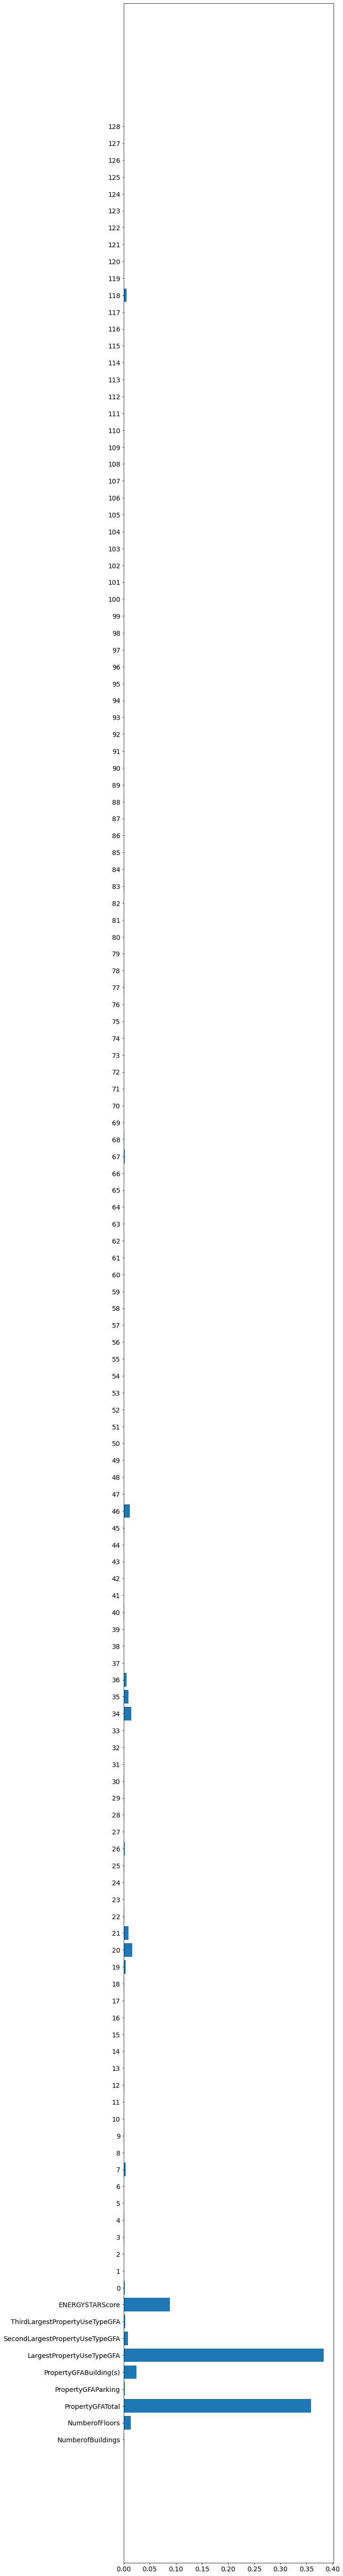

In [249]:
plt.rcParams.update({'figure.figsize': (8, 100)})
plt.rcParams.update({'font.size': 14})
plt.barh(liste_avec_EnergyStarScore, rf.feature_importances_.tolist())

In [250]:
rf.feature_importances_

array([1.31204651e-03, 1.39720075e-02, 3.58973335e-01, 2.19795966e-03,
       2.48012355e-02, 3.82675115e-01, 8.65936749e-03, 3.30962679e-03,
       8.89505265e-02, 2.39669834e-03, 3.70045590e-04, 7.59885652e-04,
       1.11862318e-03, 9.67498415e-04, 6.72934798e-05, 4.68469826e-04,
       4.27624403e-03, 1.37164652e-04, 1.41137585e-03, 1.69564377e-04,
       2.20405879e-05, 9.81192671e-04, 1.38987207e-04, 8.71215271e-05,
       1.80622021e-04, 8.27991755e-04, 1.97386104e-04, 1.29106876e-03,
       3.58070434e-03, 1.64947150e-02, 9.61105592e-03, 8.36044254e-04,
       1.95041956e-05, 7.57198905e-06, 1.25369954e-03, 2.25927091e-03,
       6.40965588e-06, 1.01054230e-03, 1.08219921e-03, 8.54517486e-04,
       5.83759162e-05, 7.97000192e-06, 1.39665709e-04, 1.49202467e-02,
       9.64751149e-03, 5.71783458e-03, 1.54677014e-06, 2.06272580e-06,
       2.27730266e-04, 9.27040846e-04, 1.16021161e-04, 7.70138231e-05,
       8.14819610e-04, 3.37557151e-04, 1.37583594e-03, 1.19476632e-02,
      

Text(0.5, 0, 'Random Forest Feature Importance')

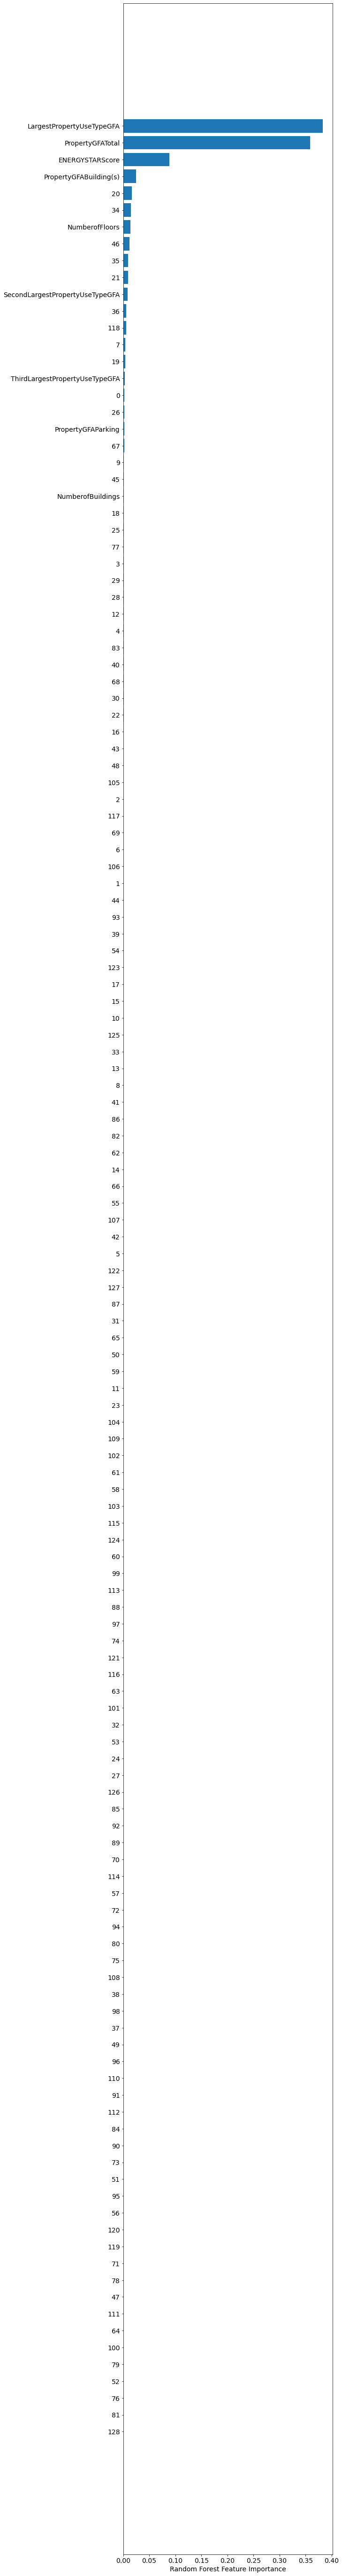

In [251]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(np.array(liste_avec_EnergyStarScore)[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [252]:
DC = encoder.inverse_transform(df_varqual_codéesbis)

In [253]:
df_varqual_codéesbis

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [254]:
encoder.feature_names_in_

array(['PrimaryPropertyType', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType'],
      dtype=object)

In [255]:
X_df = pd.DataFrame(df_varqual_codéesbis,
                    columns=encoder.get_feature_names_out(),
                    index=df_varqual_codéesbis.index)

In [256]:
X_df

,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_High-Rise Multifamily,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mid-Rise Multifamily,...,ThirdLargestPropertyUseType_Pre-school/Daycare,ThirdLargestPropertyUseType_Refrigerated Warehouse,ThirdLargestPropertyUseType_Residence Hall/Dormitory,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_Retail Store,ThirdLargestPropertyUseType_Social/Meeting Hall,ThirdLargestPropertyUseType_Strip Mall,ThirdLargestPropertyUseType_Supermarket/Grocery Store,ThirdLargestPropertyUseType_Swimming Pool,ThirdLargestPropertyUseType_Worship Facility
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [257]:
X_df.columns[20]

'PrimaryPropertyType_Supermarket / Grocery Store'